<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
بعد از آماده سازی داده ها این مرحله اجرا می شود
</b>
</div>

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1- فراخوان توابع و کتابخانه های مورد نیاز
</b>
</div>

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import gaussian_kde
#working_dir = os.getcwd()
working_dir ='..'  # Use on Jupyter Notebook

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
2- ساخت دیتافریم خالی از روی داده های کوره
</b>
</div>

In [4]:
df = pd.read_csv(f"{working_dir}/data/eaf_data.csv")
df.set_index(keys='Heat', inplace=True ,drop=True)
root_df = pd.DataFrame(data=df['tar'])
del df
print(root_df)

                tar
Heat               
4024675.0  14020915
4024676.0  14020915
4024677.0  14020915
4024678.0  14020915
4024681.0  14020915
...             ...
4034590.0  14030915
4034591.0  14030915
4034592.0  14030915
4034593.0  14030915
4034594.0  14030915

[3317 rows x 1 columns]


<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
3- تجمیع تمام دیتاهای متریال ورودی به کوره 
</b>
</div>

In [24]:
df = pd.read_csv(f"{working_dir}/data/eaf_data.csv")
df.set_index(keys='Heat', inplace=True ,drop=True)
root_df = pd.DataFrame(data=df['tar'])
print(root_df.shape)
del df
#---------------Add Coke 1030 Labels------------
df = pd.read_csv(f"{working_dir}/data/coke_1030_with_labels.csv")
print(df.shape)
results = pd.merge(left=root_df,right=df.drop(labels=['labels'] ,axis=1),on='tar',how='left',suffixes=(None, '_coke1030'))
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
print(root_df.shape)
#---------------Add Coke Fine Labels------------
df = pd.read_csv(f"{working_dir}/data/coke_fine_with_labels.csv")
print(df.shape)
results = pd.merge(left=root_df,right=df.drop(labels=['labels'] ,axis=1),on='tar',how='left',suffixes=(None, '_cokefine'))
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add dolomite Labels------------
df = pd.read_csv(f"{working_dir}/data/dolo_with_labels.csv")
print(df.shape)
results = pd.merge(left=root_df,right=df.drop(labels=['labels'] ,axis=1),on='tar',how='left',suffixes=(None, '_dolomite'))
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add dri Labels------------
df = pd.read_csv(f"{working_dir}/data/dri_with_labels.csv")
print(df.shape)
results = pd.merge(left=root_df,right=df.drop(labels=['labels'] ,axis=1),on='tar',how='left',suffixes=(None, '_dri'))
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add lime Labels------------
df = pd.read_csv(f"{working_dir}/data/lime_with_labels.csv")
print(df.shape)
results = pd.merge(left=root_df,right=df.drop(labels=['labels'] ,axis=1),on='tar',how='left',suffixes=(None, '_lime'))
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add slag Labels------------
df = pd.read_csv(f"{working_dir}/data/slag_with_labels.csv")
print(df.shape)
results = pd.merge(left=root_df,right=df,left_index=True,right_on='heat_no',how='left',suffixes=(None, '_slag')).rename({'labels':'Slag_Label'},axis=1)
results.drop(labels=['heat_no'] ,axis=1,inplace=True)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add EAF Data------------
df = pd.read_csv(f"{working_dir}/data/eaf_data.csv")
df.drop(labels=['tar'] ,axis=1,inplace=True)
print(df.shape)
results = pd.merge(left=root_df,right=df,left_index=True,right_on='Heat',how='left',suffixes=(None, '_eaf'))
results.drop(labels=['Heat'] ,axis=1,inplace=True)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
root_df.drop(labels=['tar'] ,axis=1,inplace=True)
root_df = root_df.ffill()
print(root_df.shape)
root_df.to_csv(f"{working_dir}/data/eaf_and_feed_all.csv",index=True)
del root_df

(3317, 1)
(157, 5)
(3317, 4)
(181, 5)
(289, 7)
(345, 15)
(316, 5)
(1649, 12)
(3317, 19)
(3317, 56)


(3317, 55)
(3317, 55)
            0               1
0          md             feo
1     cao_dri            sio2
2     cao_dri           al2o3
3     cao_dri               p
4     cao_dri             mno
5        sio2           al2o3
6        sio2               p
7        sio2             mno
8     mgo_dri           al2o3
9       al2o3               p
10      al2o3             mno
11         b2              b3
12  Power Off          Delays
13    DRI [t]         EAF_DRI
14   O2 [Nm3]  Chemical [MWh]
(3317, 2)
(3317,)


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_7492\3068094027.py:35: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


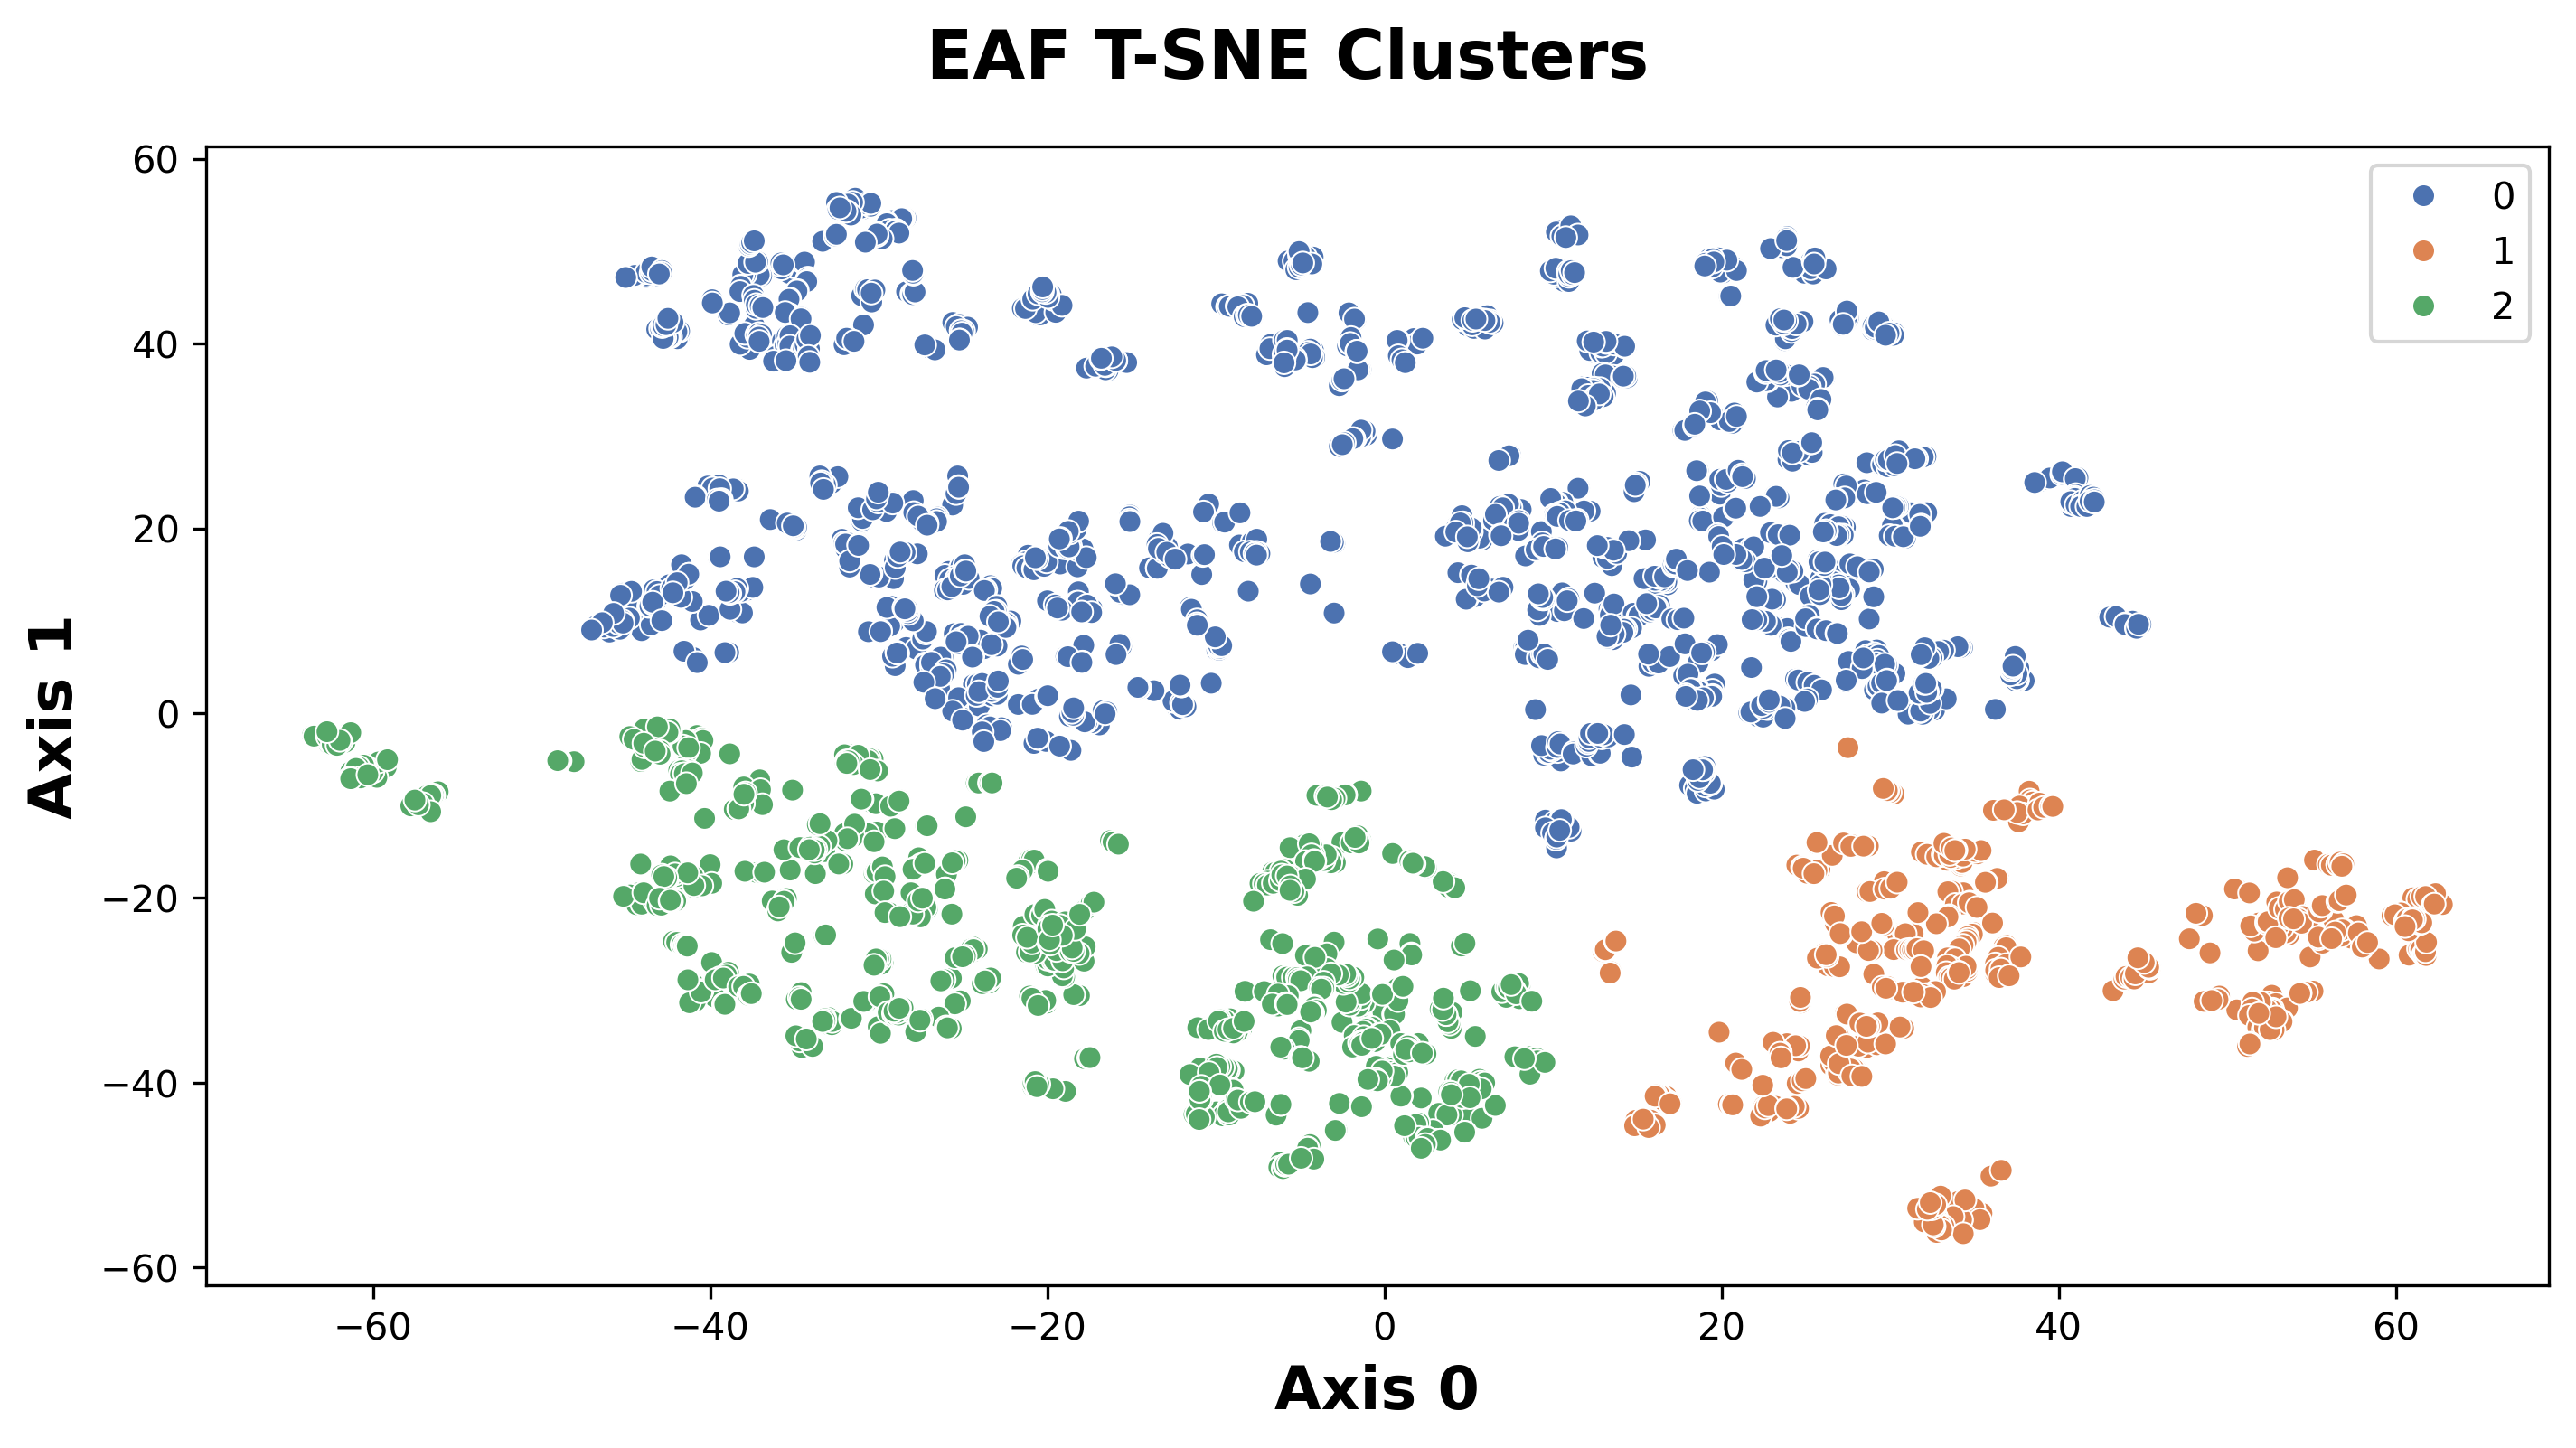

(3317, 56)
Index(['c', 's', 's112', 'c_cokefine', 's_cokefine', 's05', 'cao', 'mgo',
       's0_95', 's95_385', 's385_1000', 'fe_metal', 'fe_total', 'md', 'c_dri',
       'cao_dri', 'sio2', 'mgo_dri', 'al2o3', 'p', 'mno', 'gunge', 'feo',
       'feo_c', 'cao_lime', 'mgo_lime', 's0_95_lime', 'cao_slag', 'feo_slag',
       'sio2_slag', 'mgo_slag', 'al2o3_slag', 'p2o5', 'mno_slag', 'b2', 'b3',
       'b4', 'Duration', 'Power On', 'Power Off', 'Delays', 'DRI [t]',
       'Ele [MW]', 'Tapped [t]', 'Tapped [kWh/t]', 'O2 [Nm3]', 'CH4 [Nm3]',
       'C.inj [kg]', 'Chemical [MWh]', 'C [kg]', 'CaO [kg]', 'MgO [kg]',
       'Tapping Time [Sec]', 'EAF_DRI', 'HDRI(T)'],
      dtype='object')


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_7492\3068094027.py:64: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_7492\3068094027.py:64: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_7492\3068094027.py:64: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_7492\3068094027.py:64: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_7492\3068094027.py:64: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_7492\3068094027.py:64: UserWa

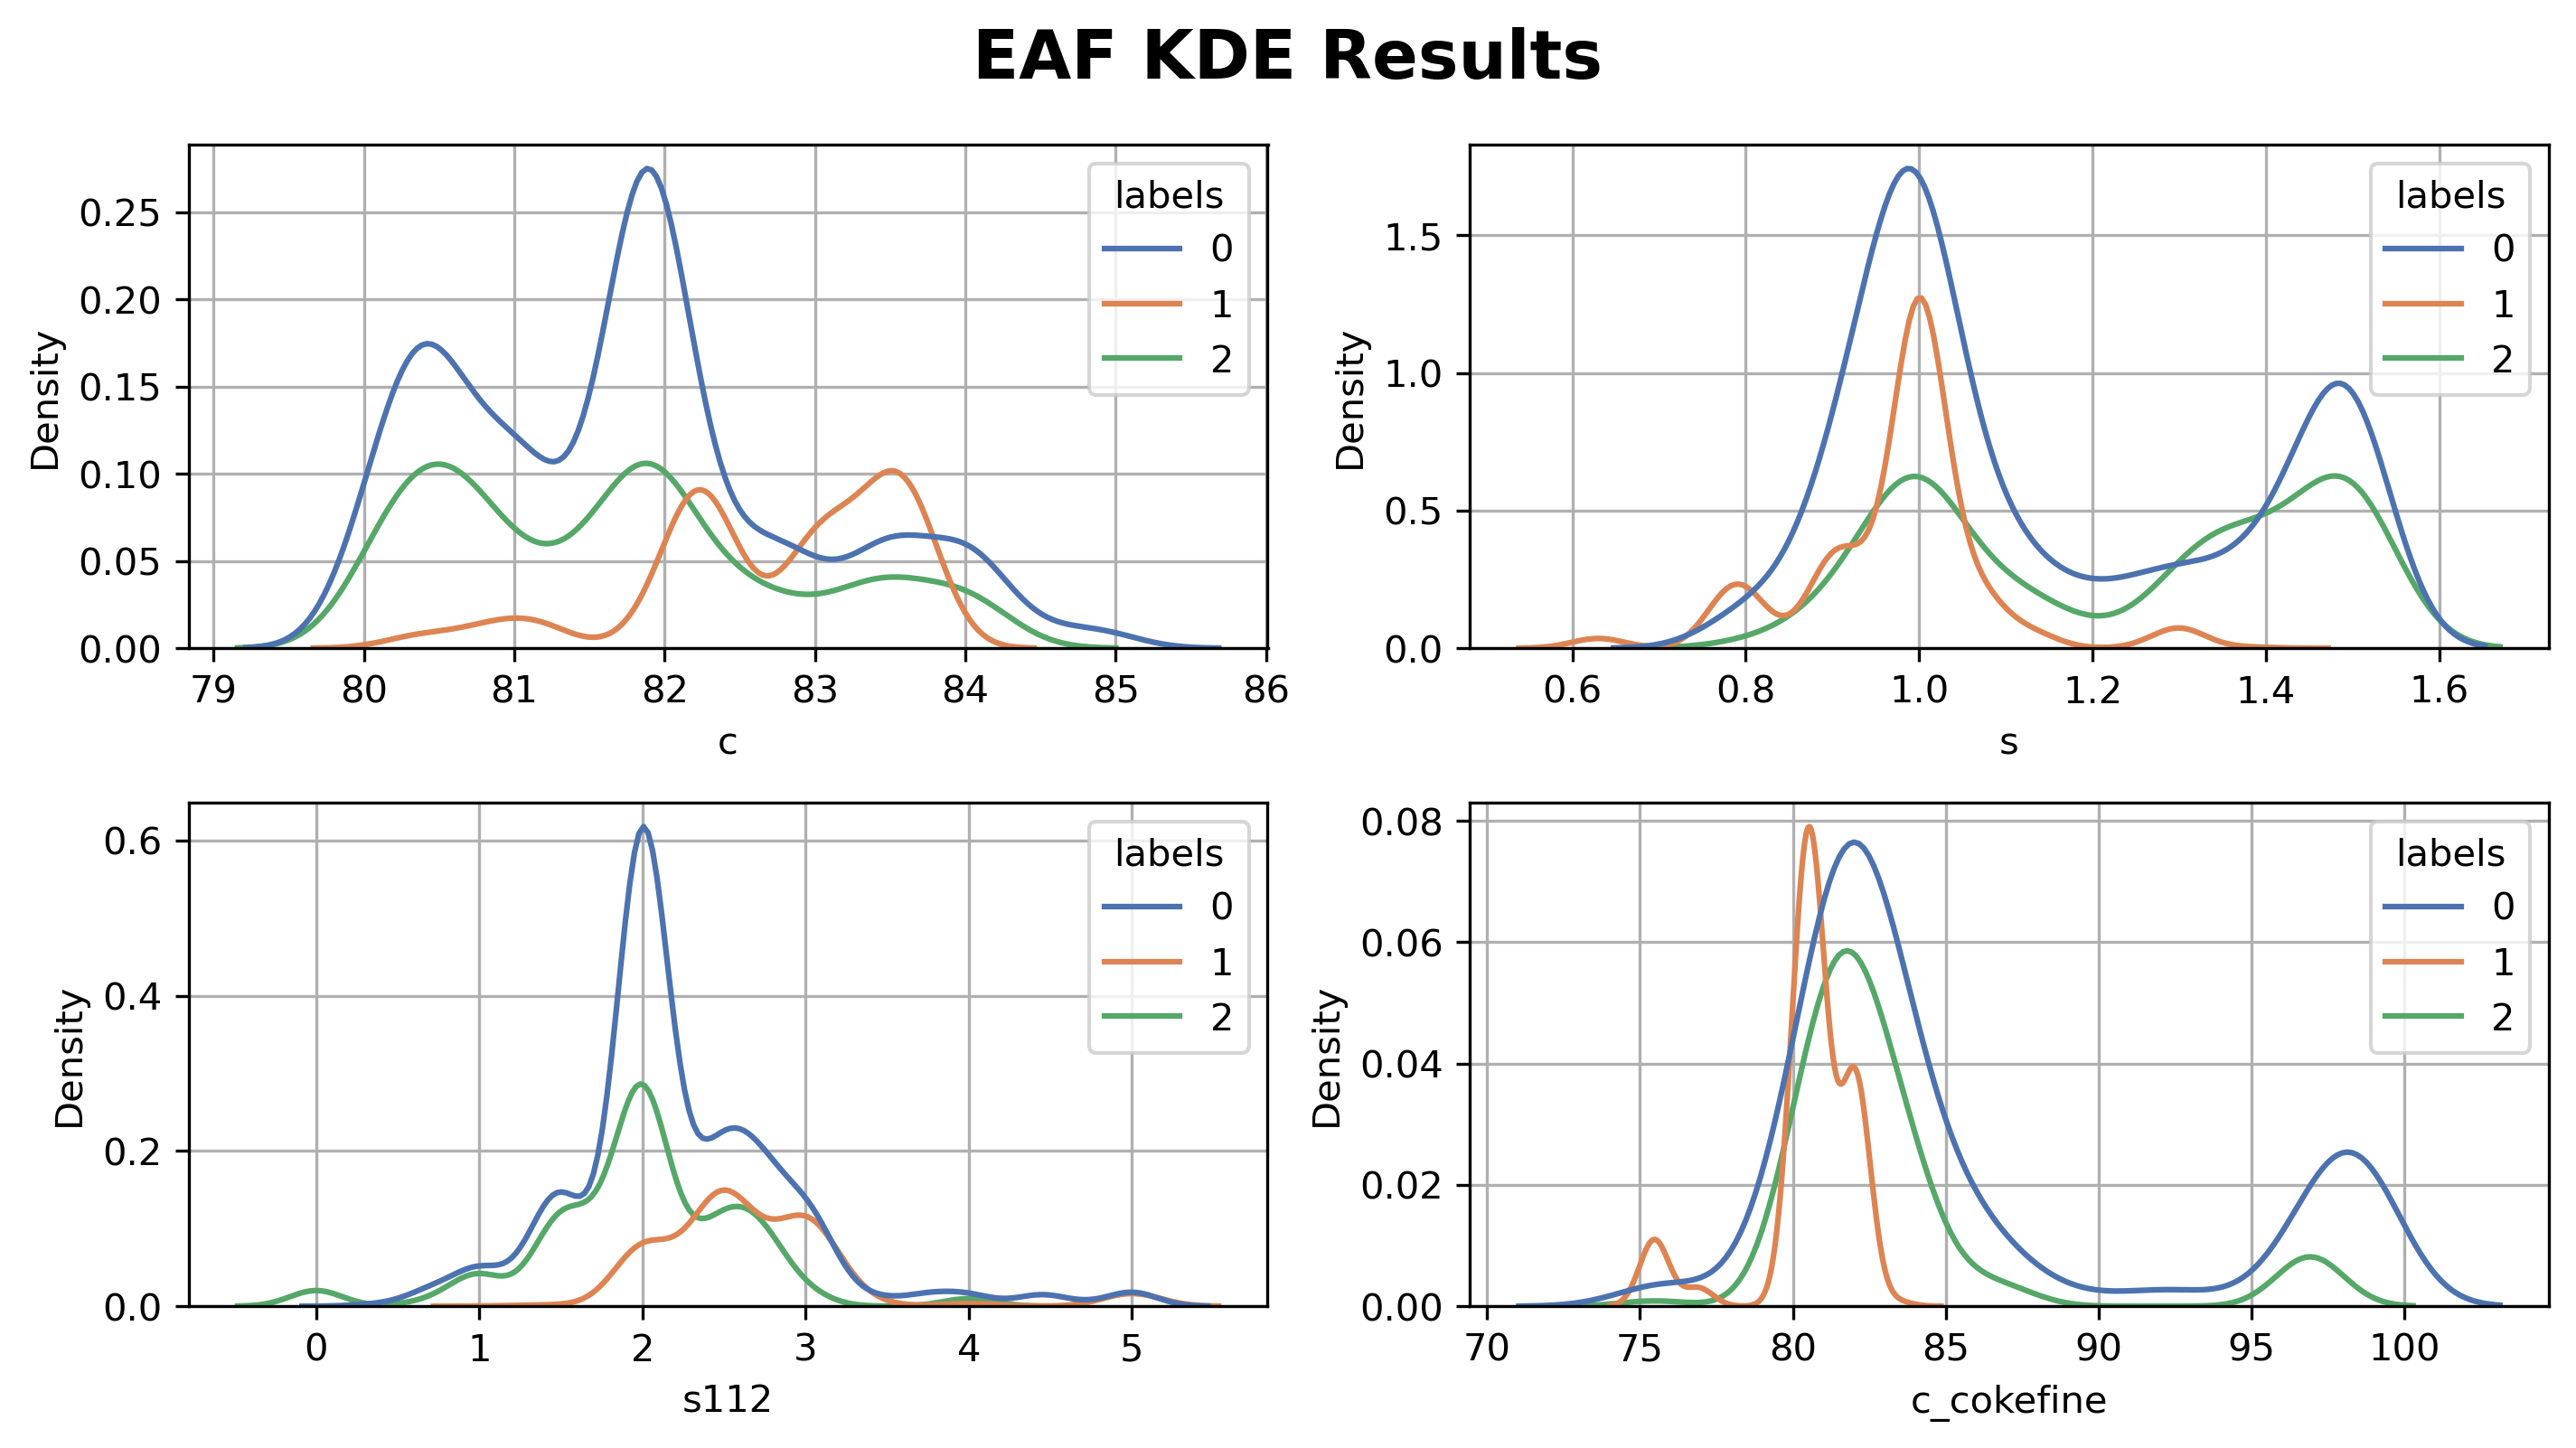

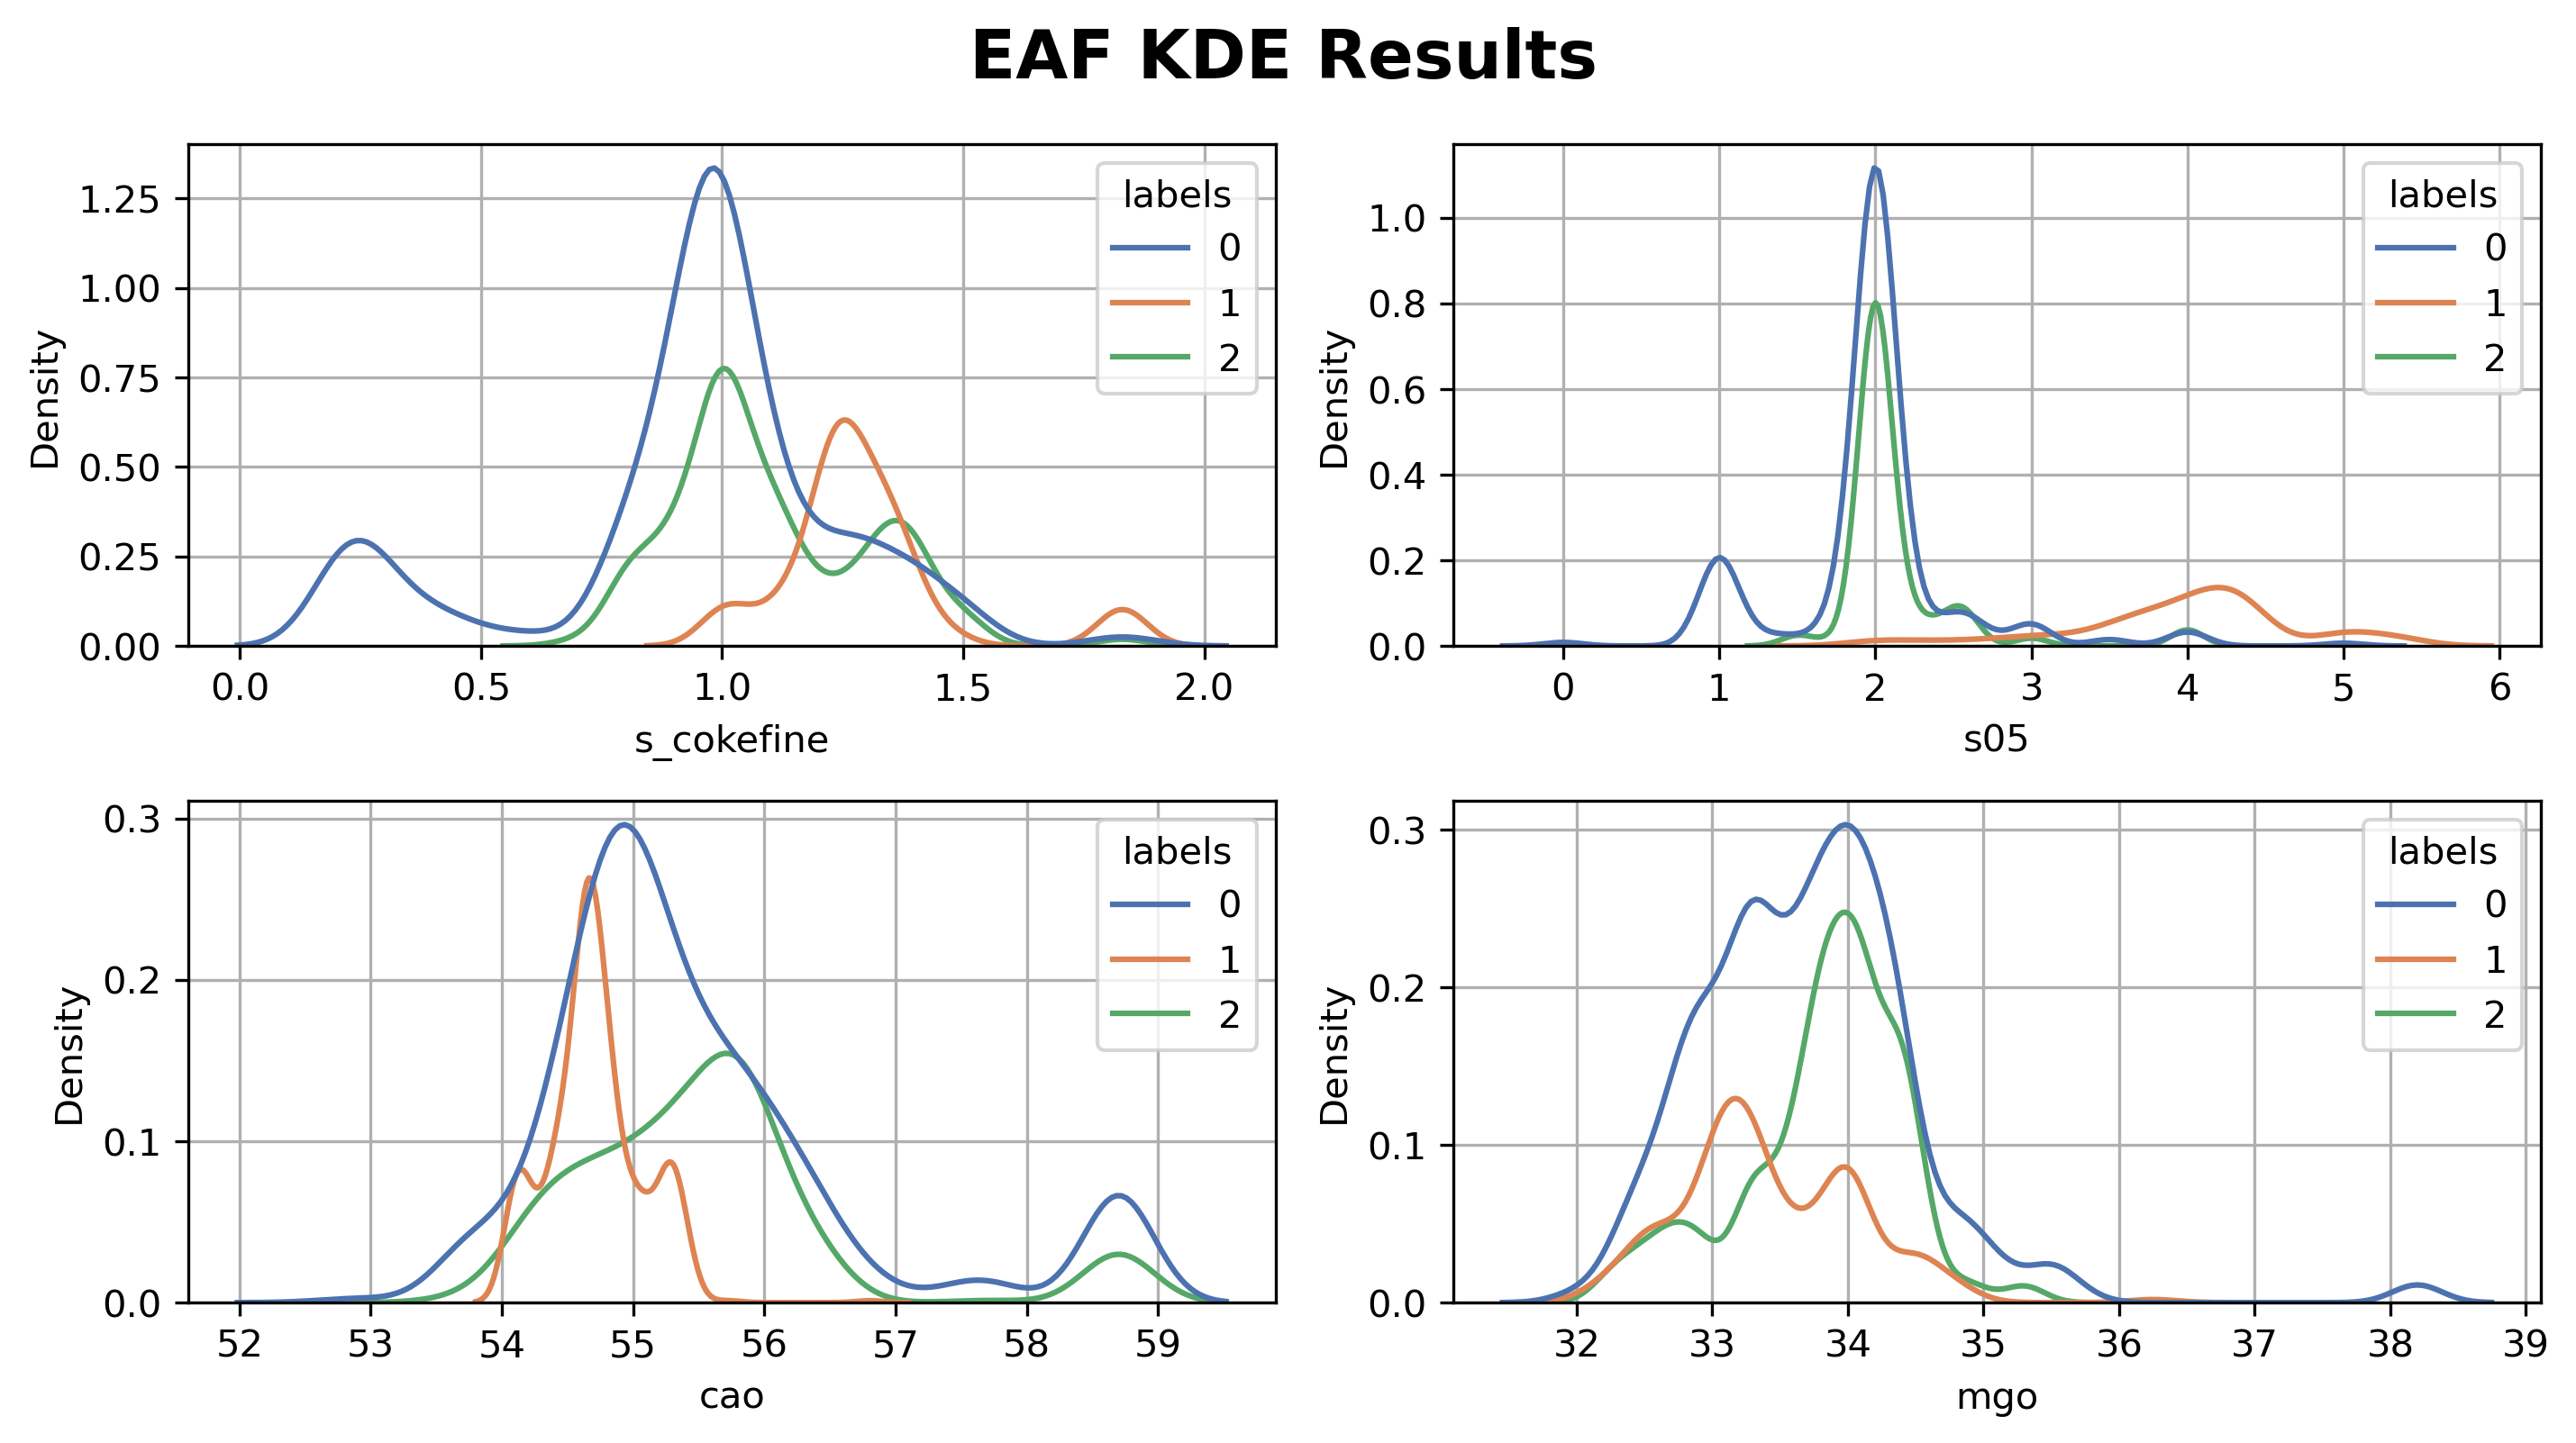

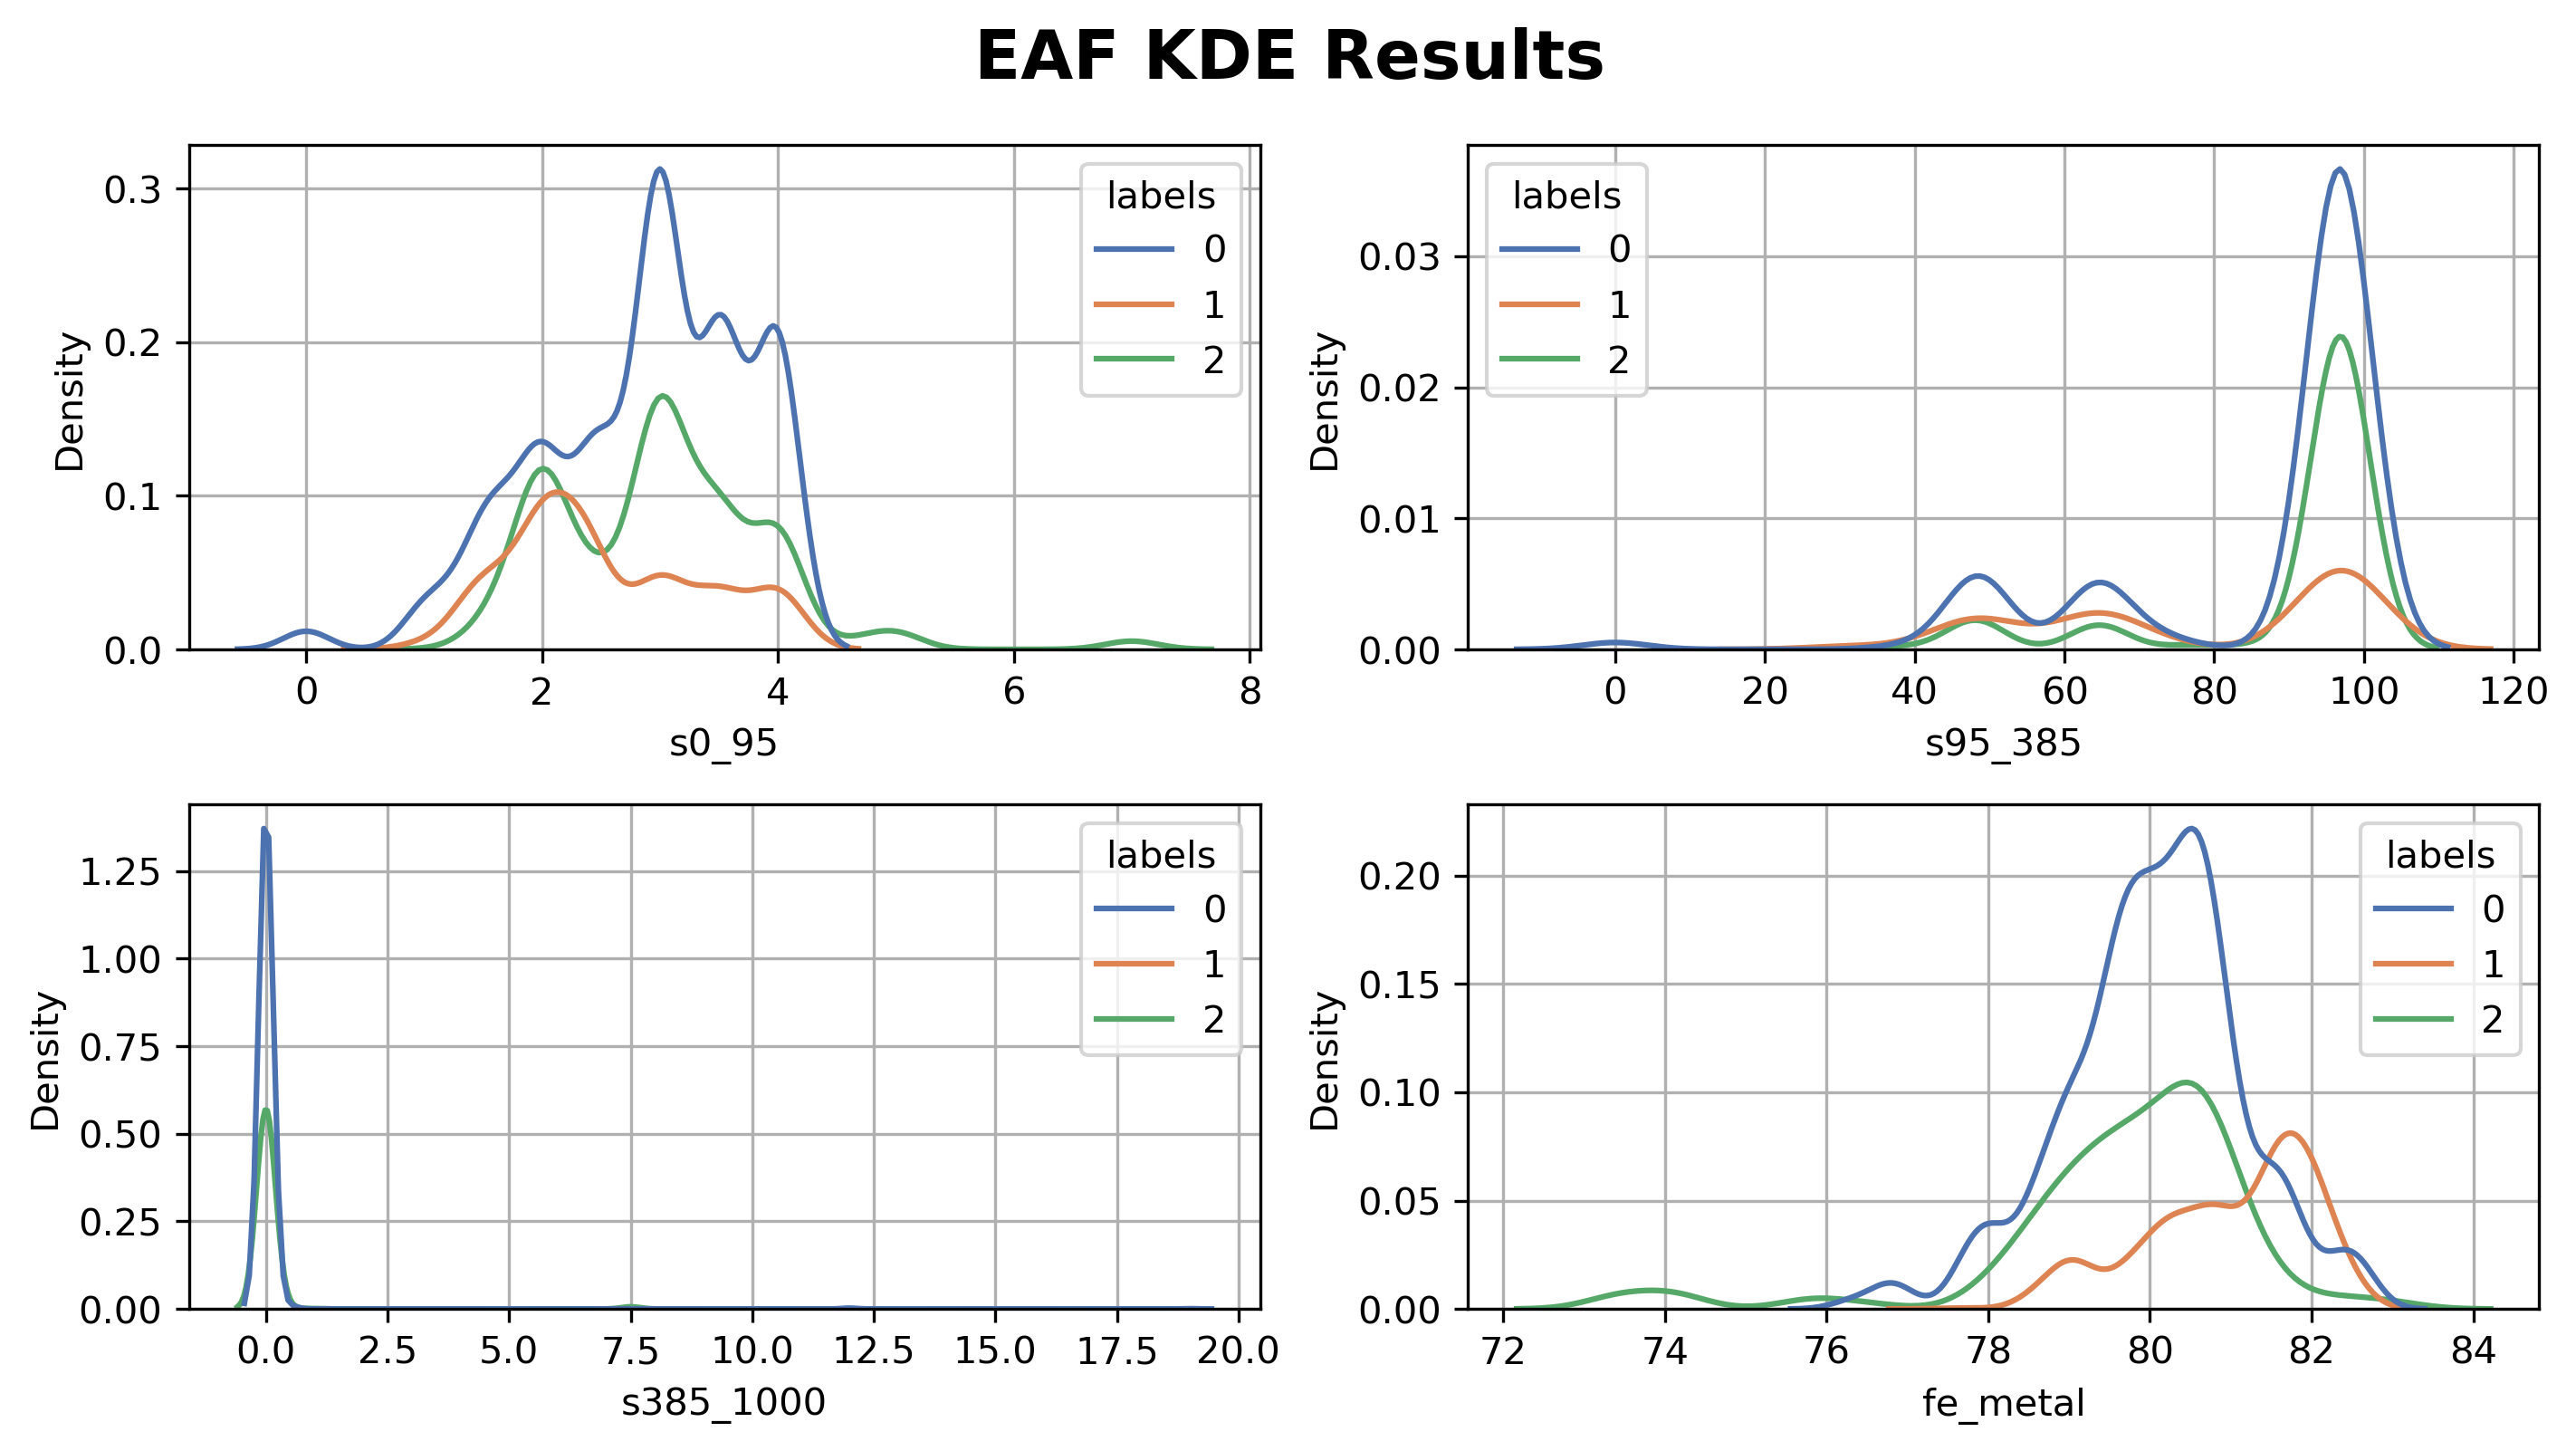

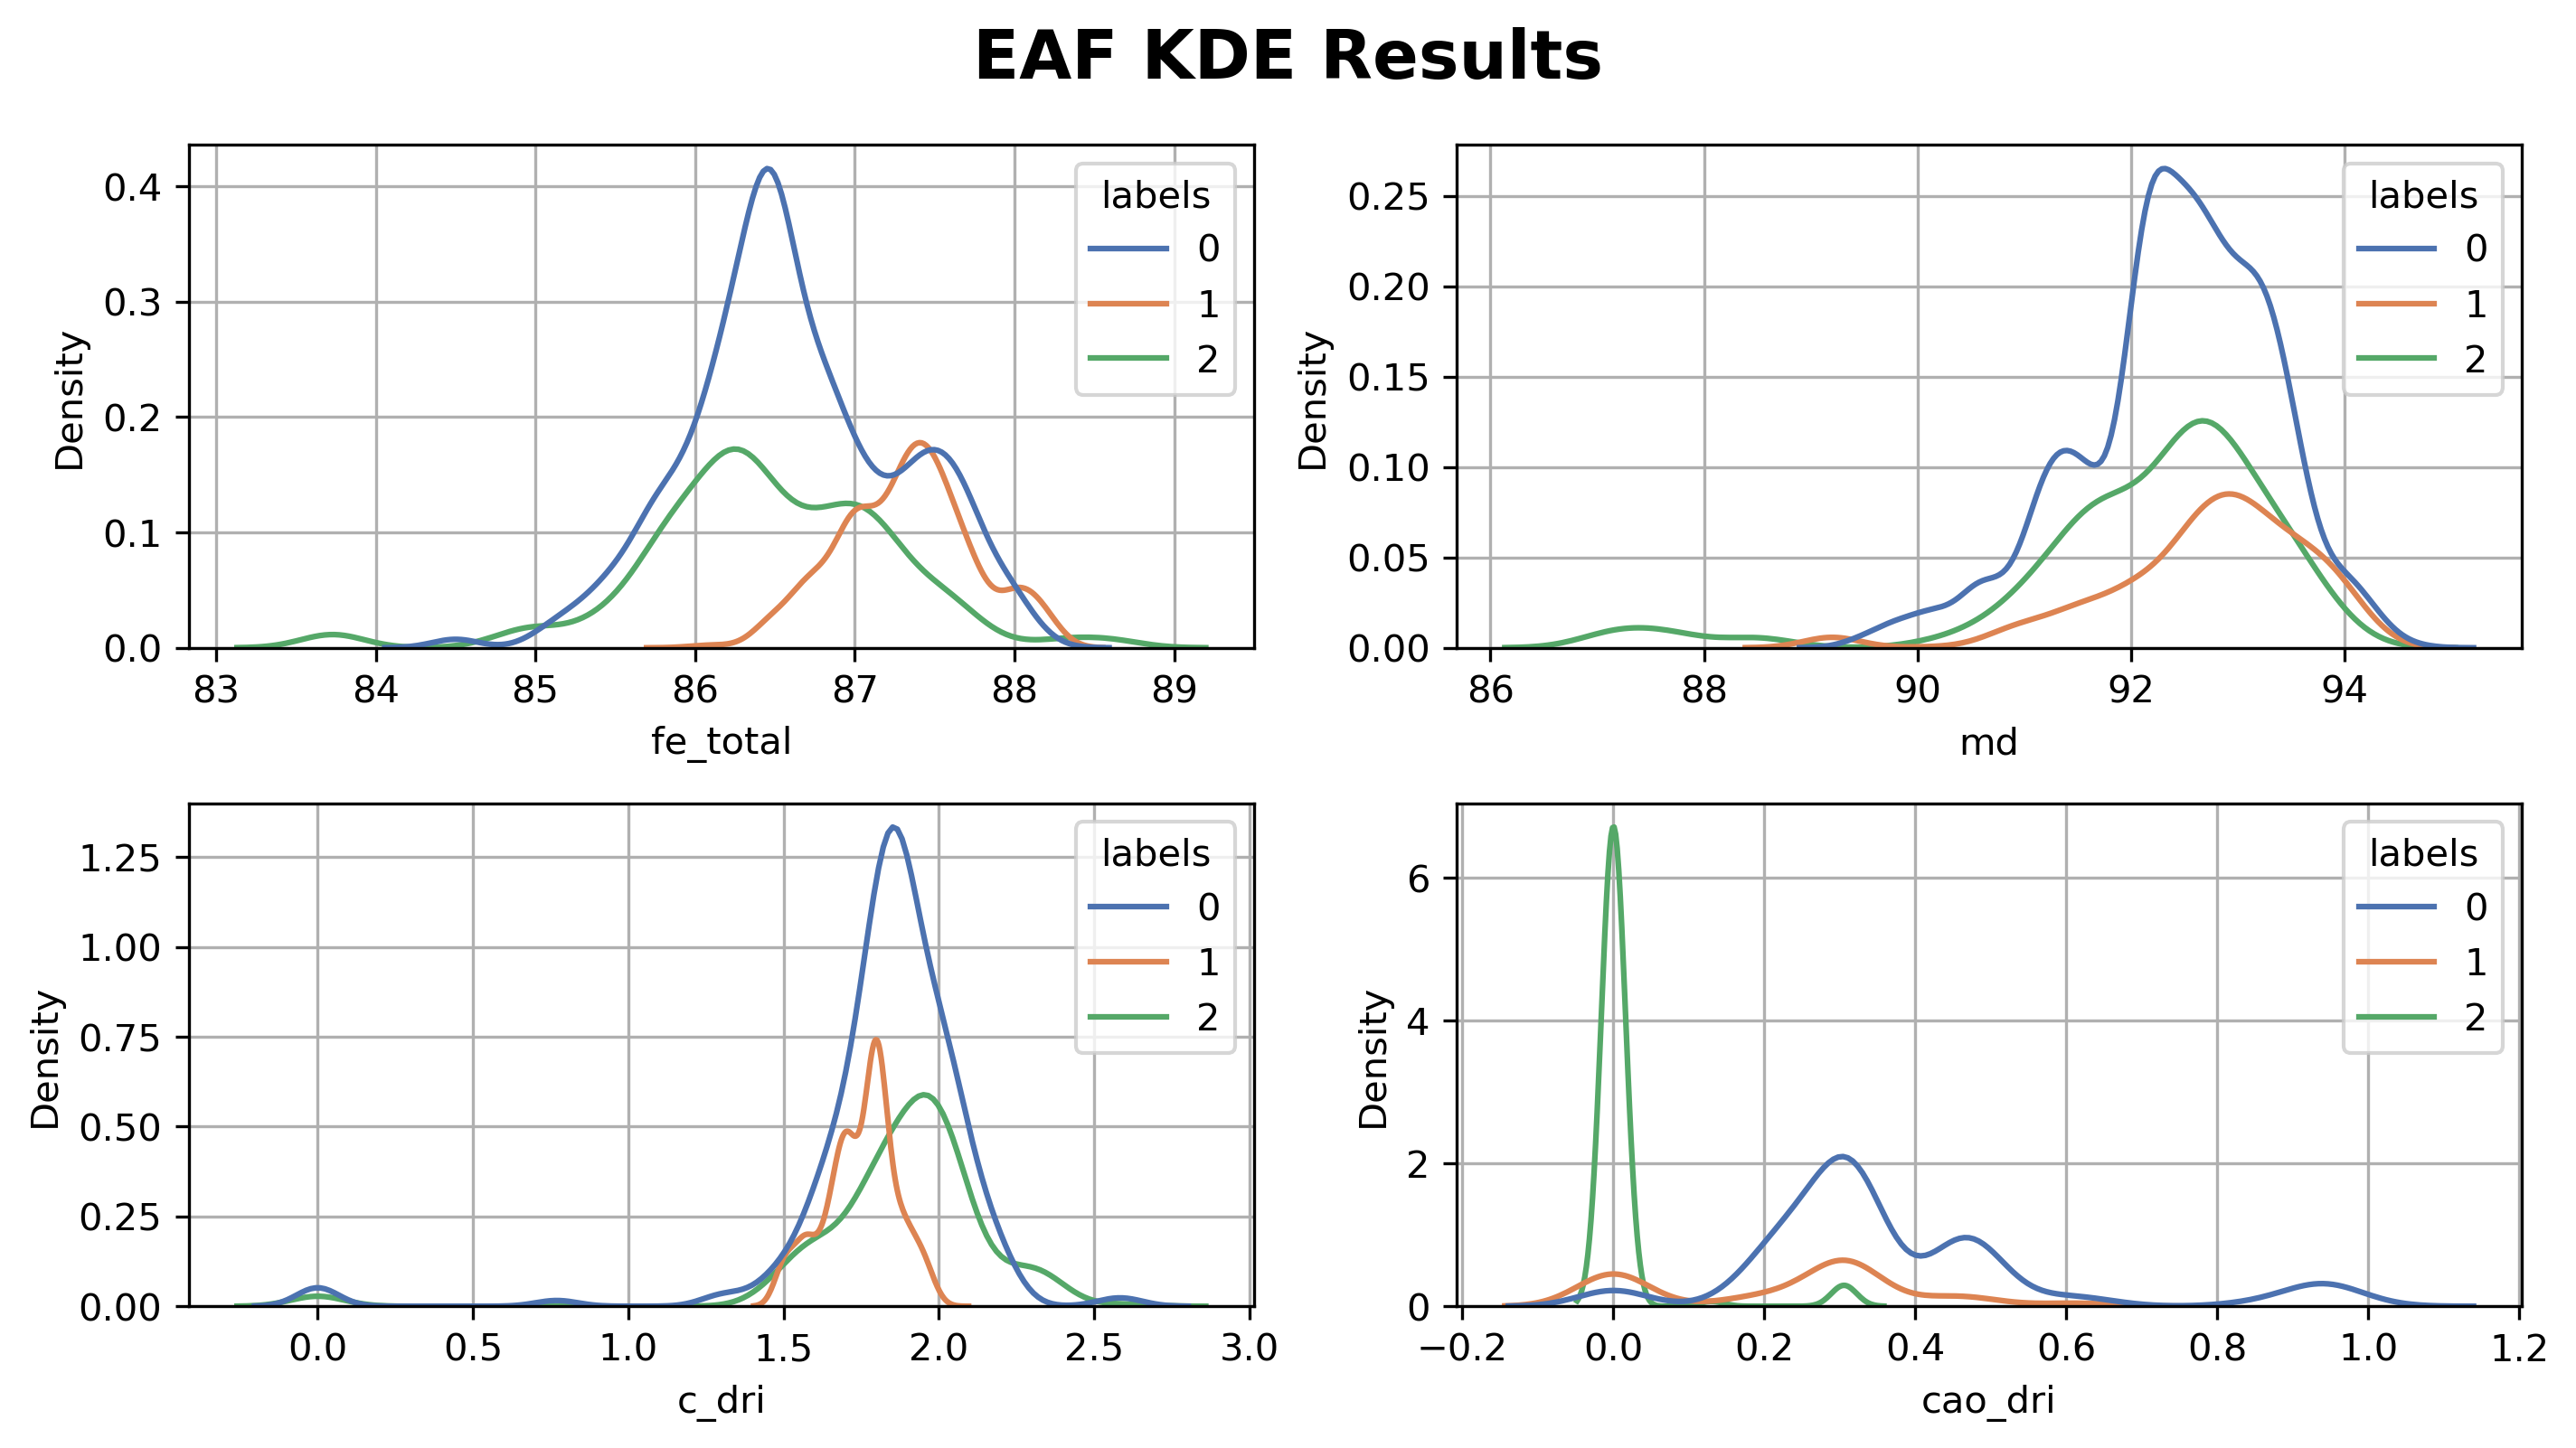

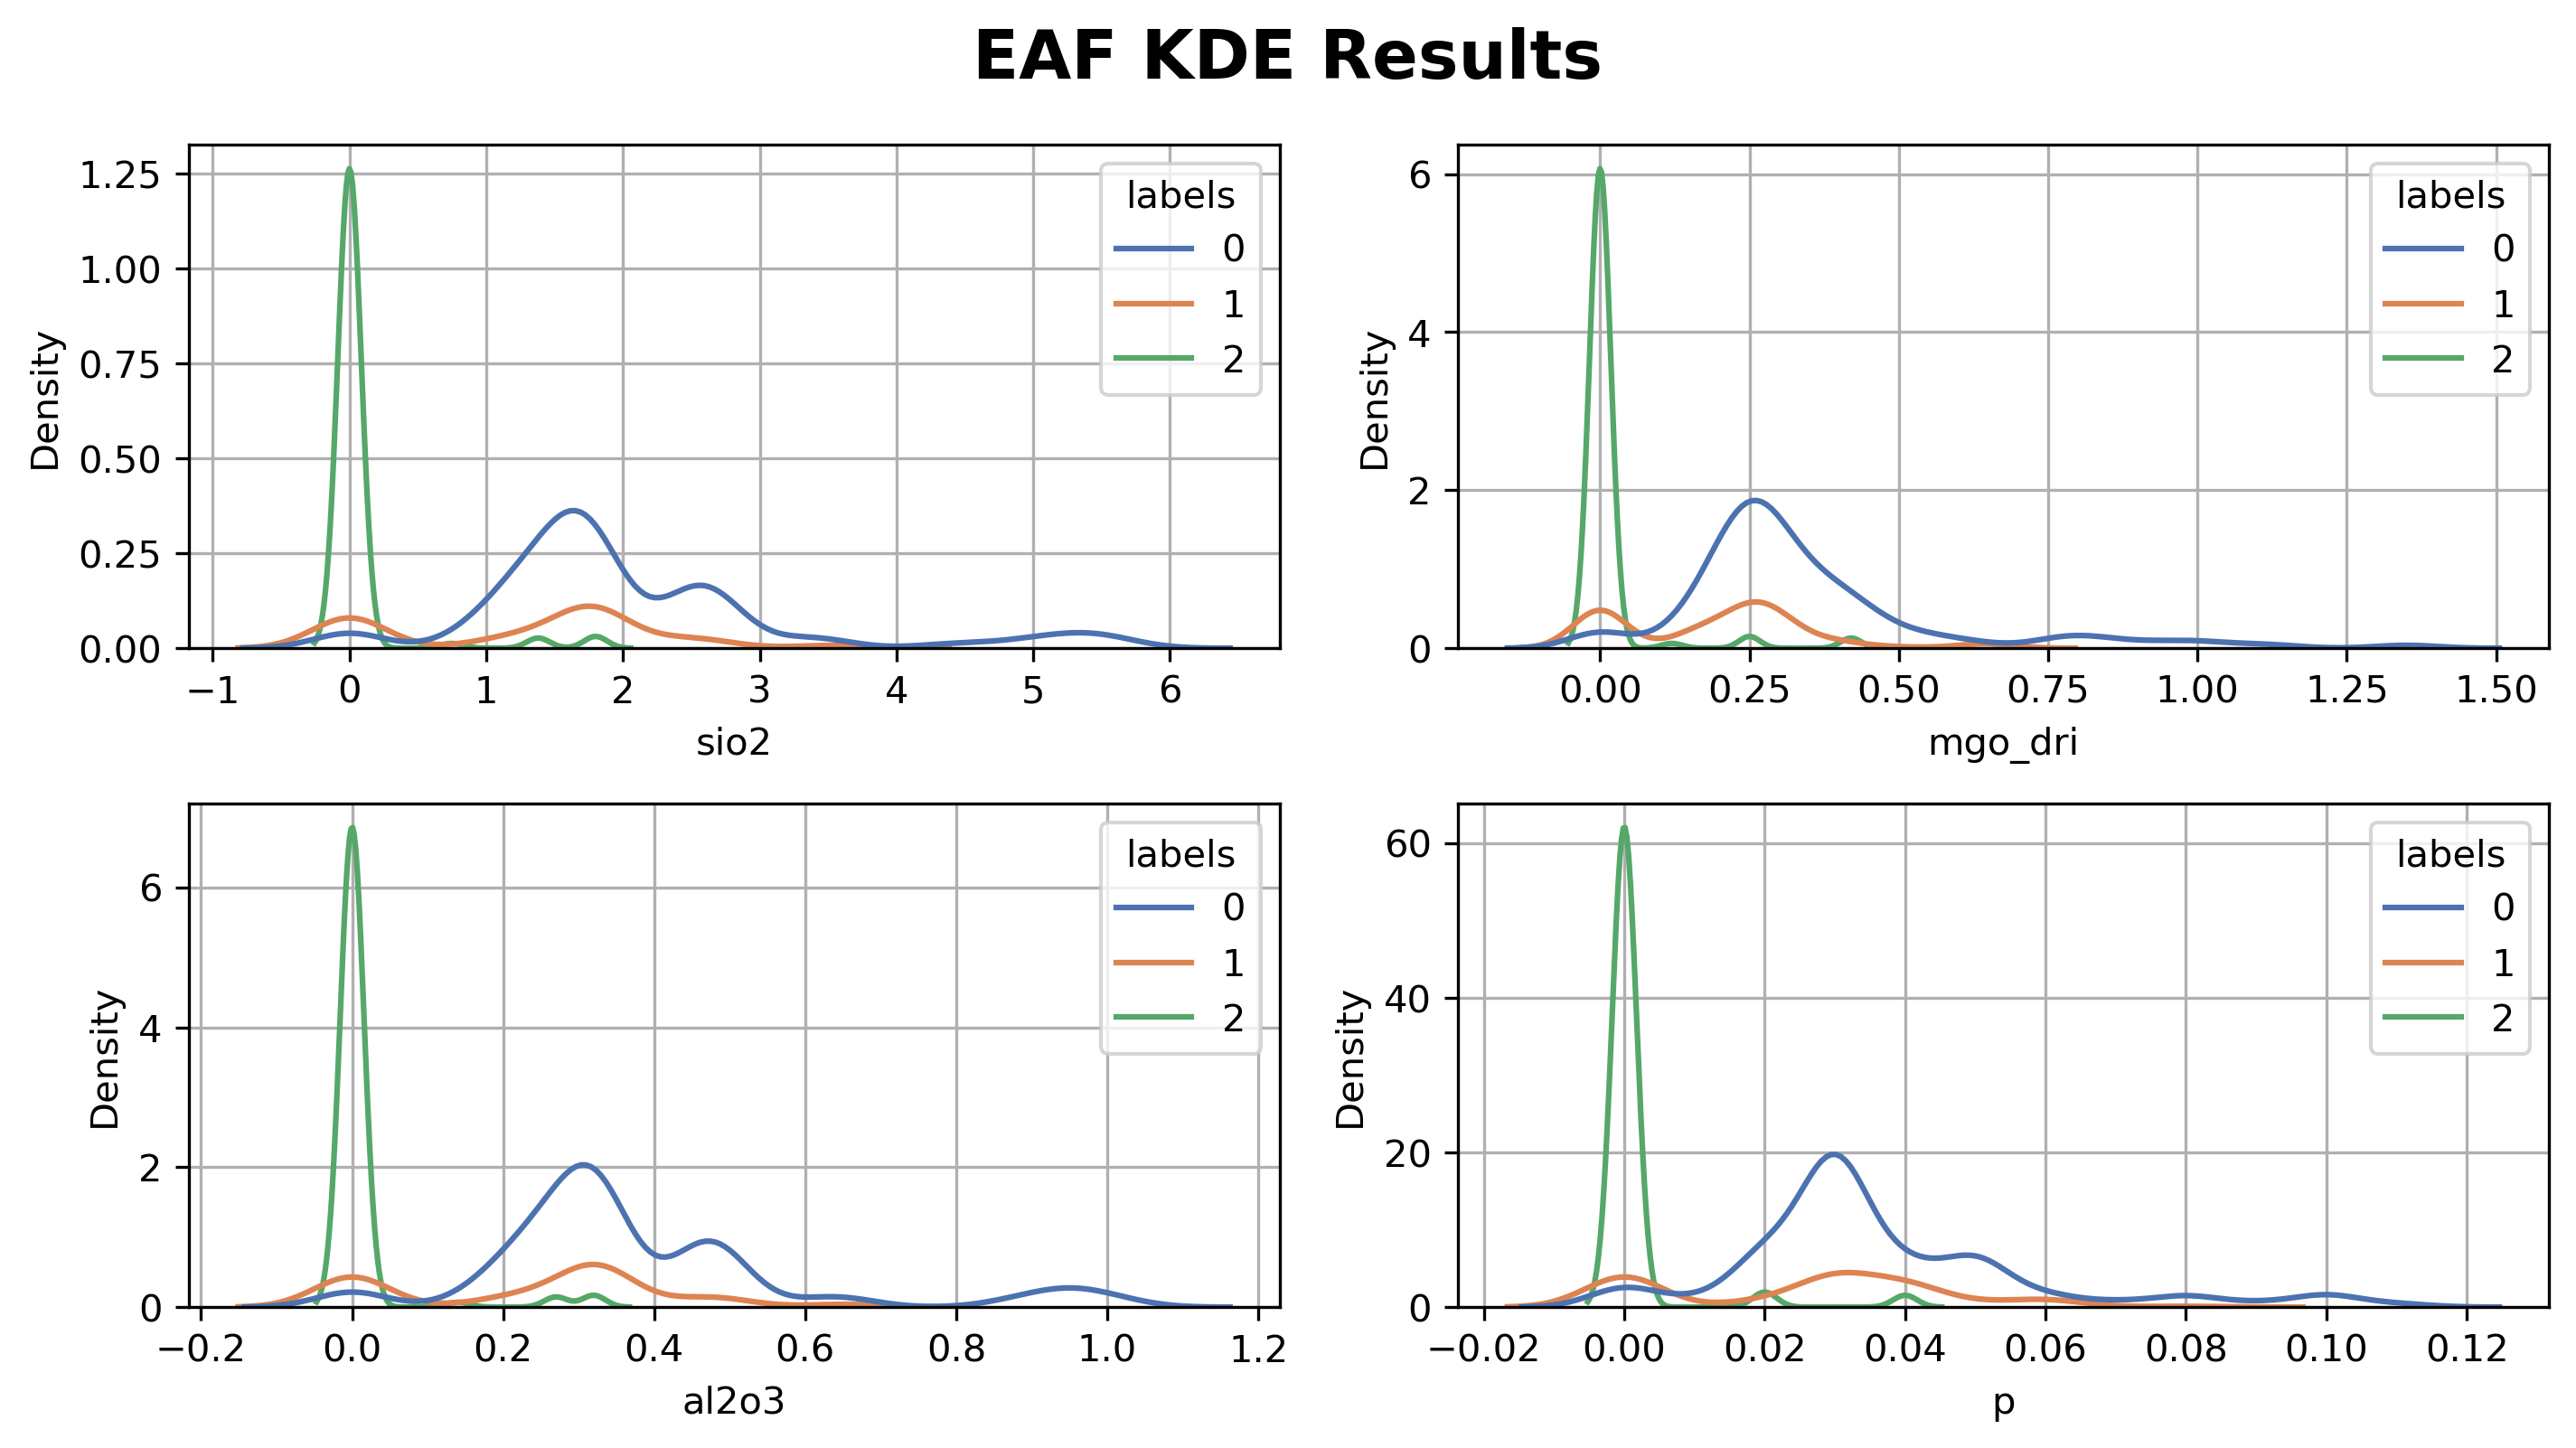

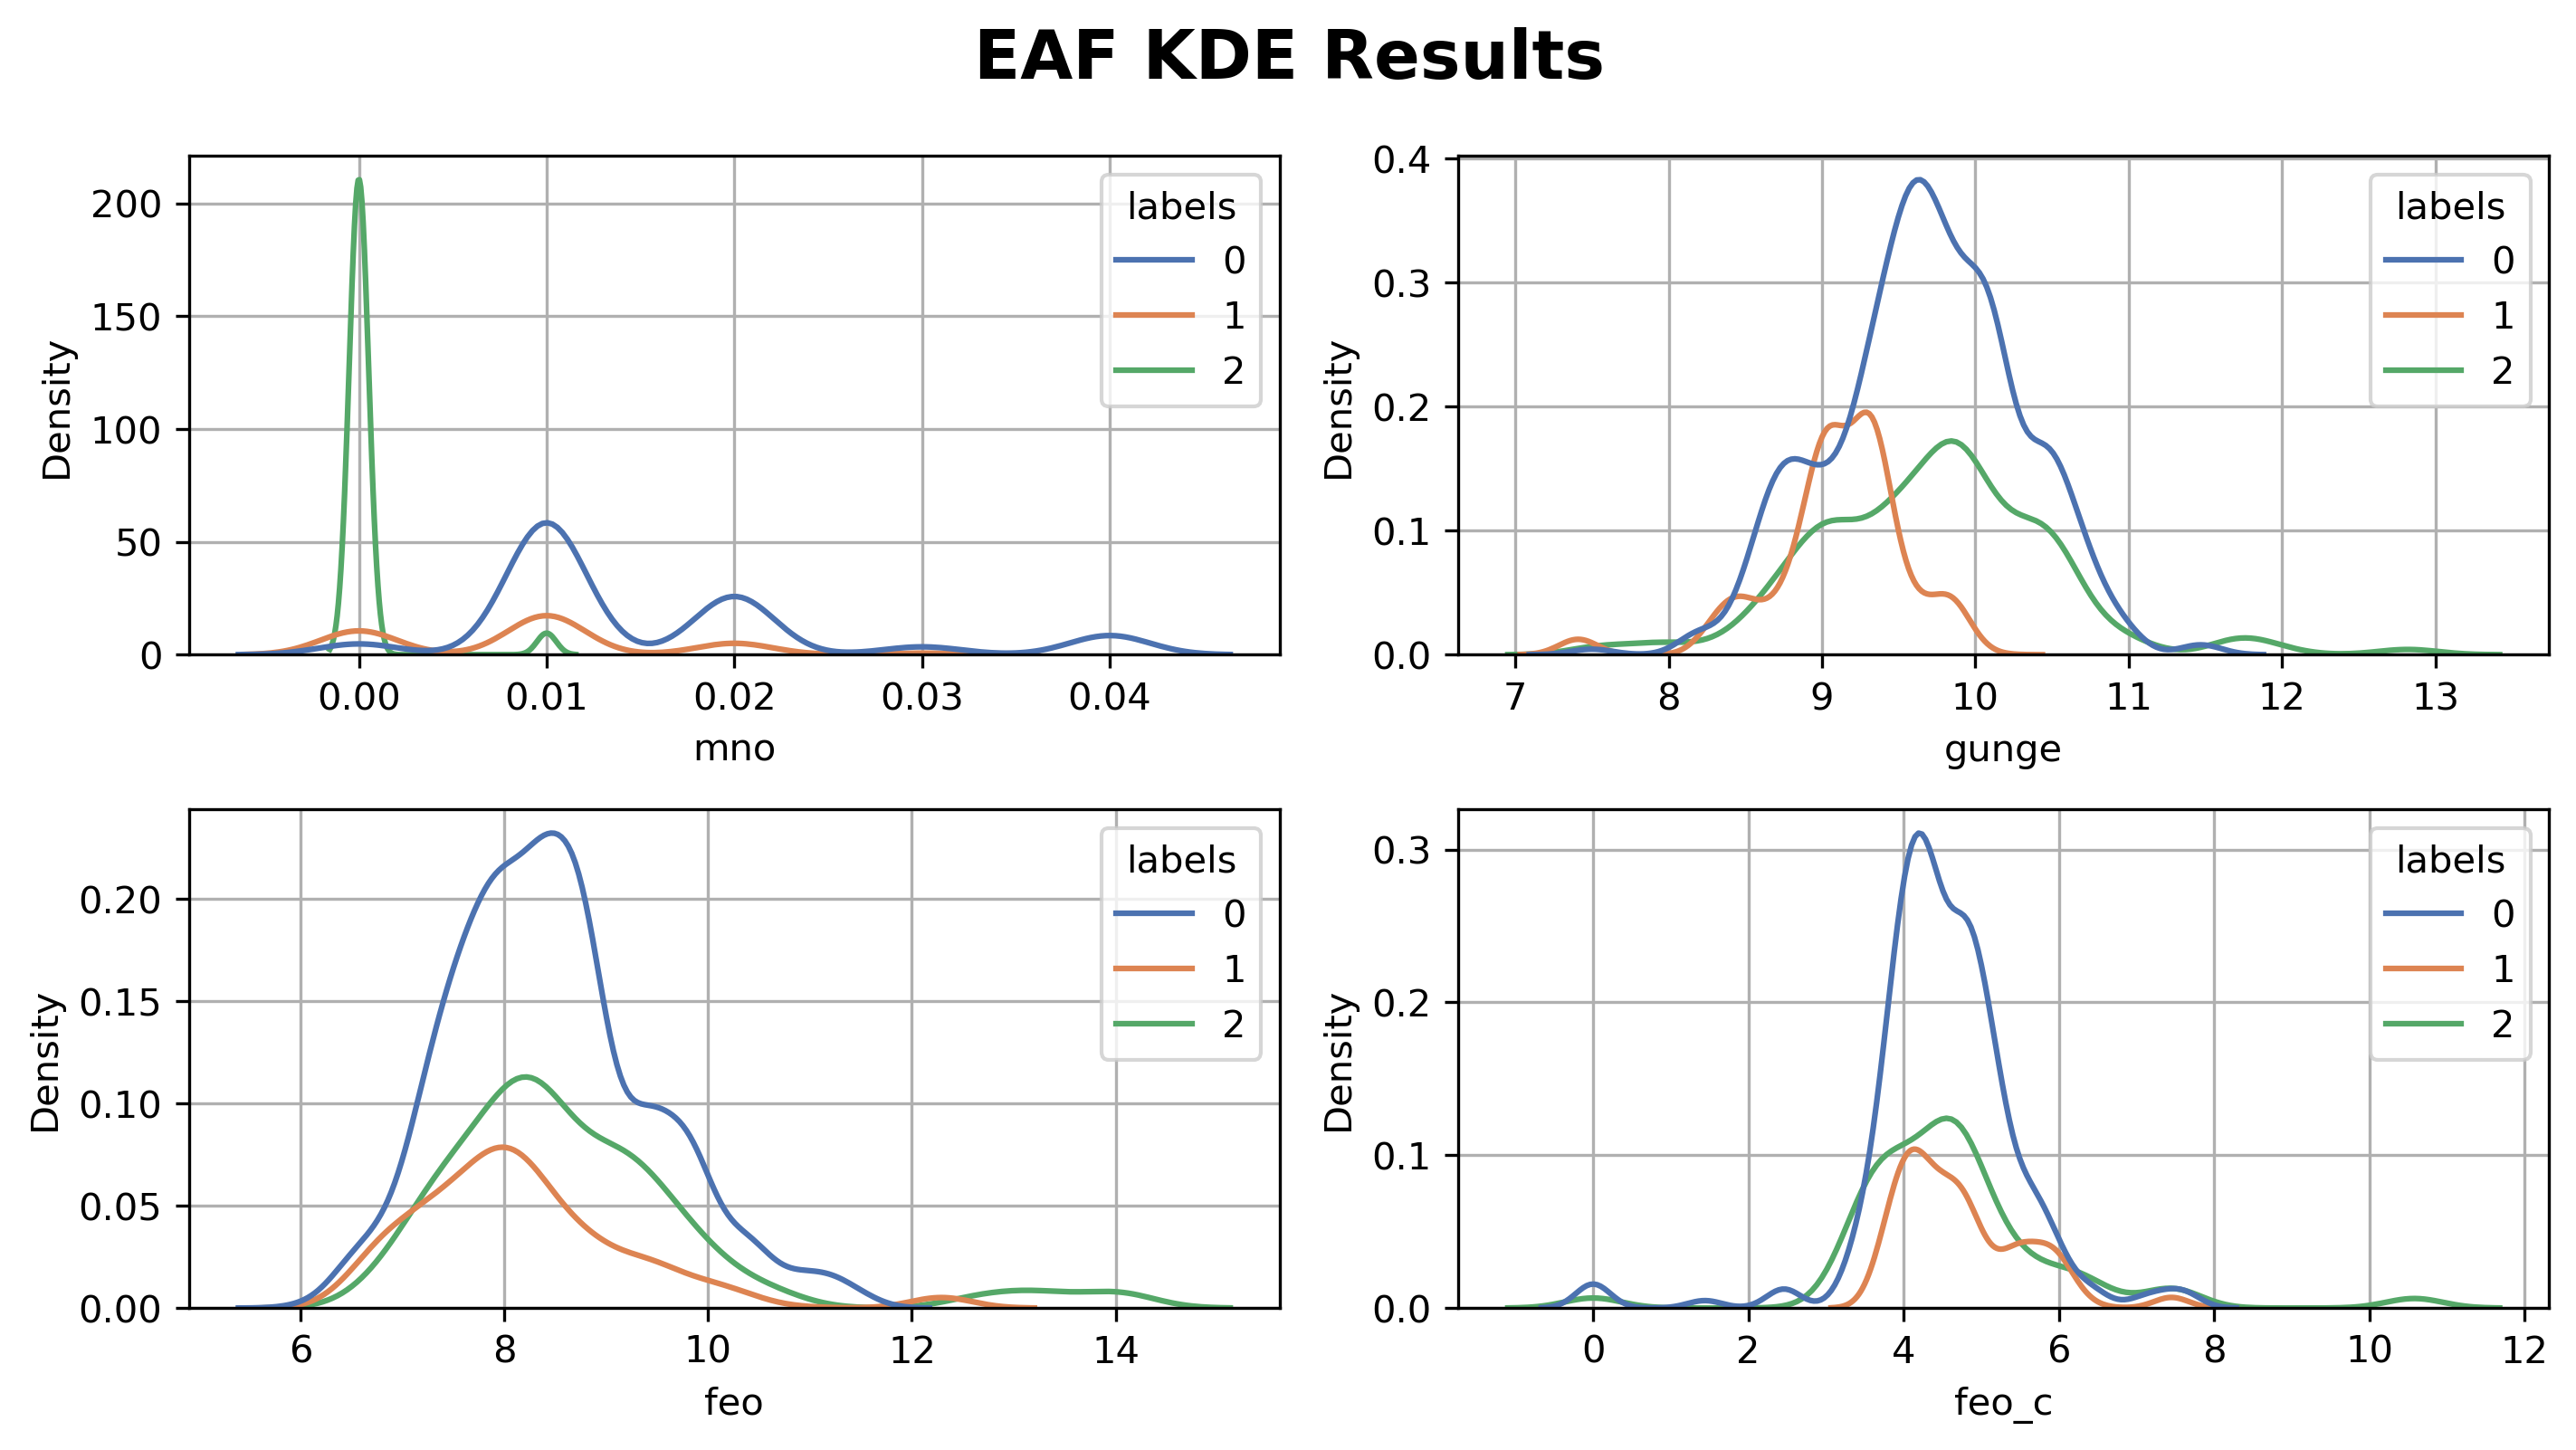

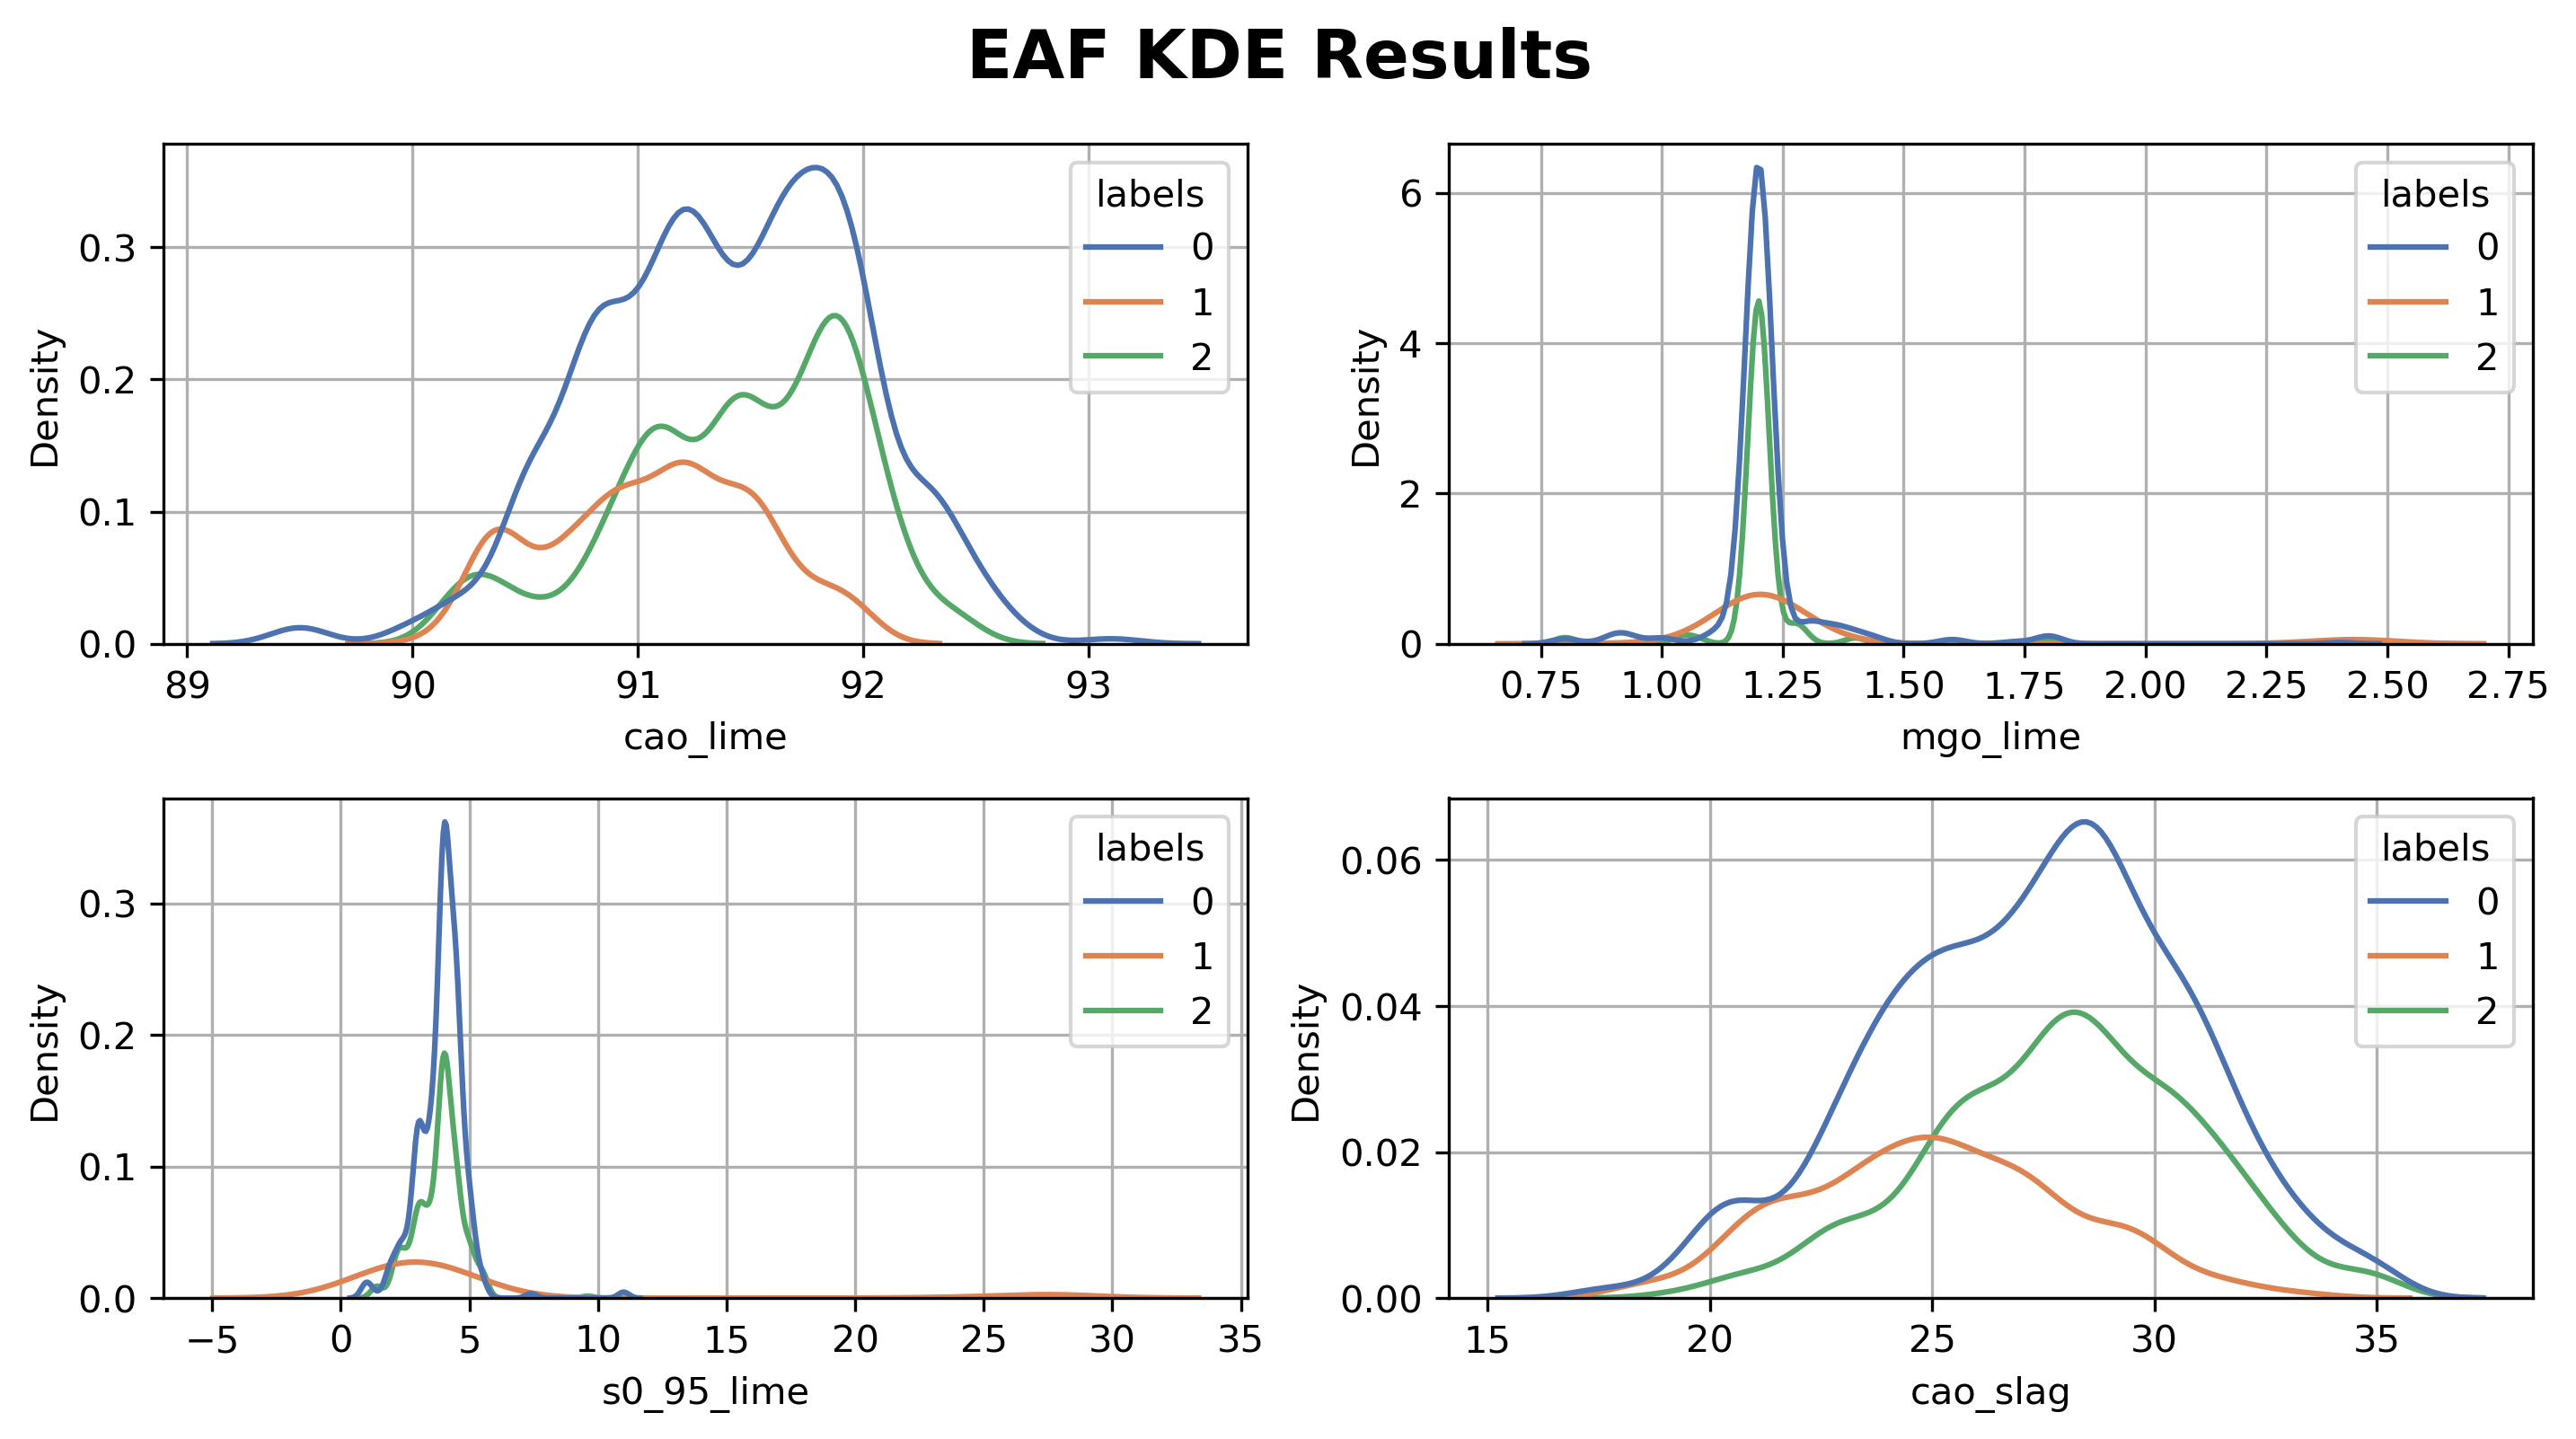

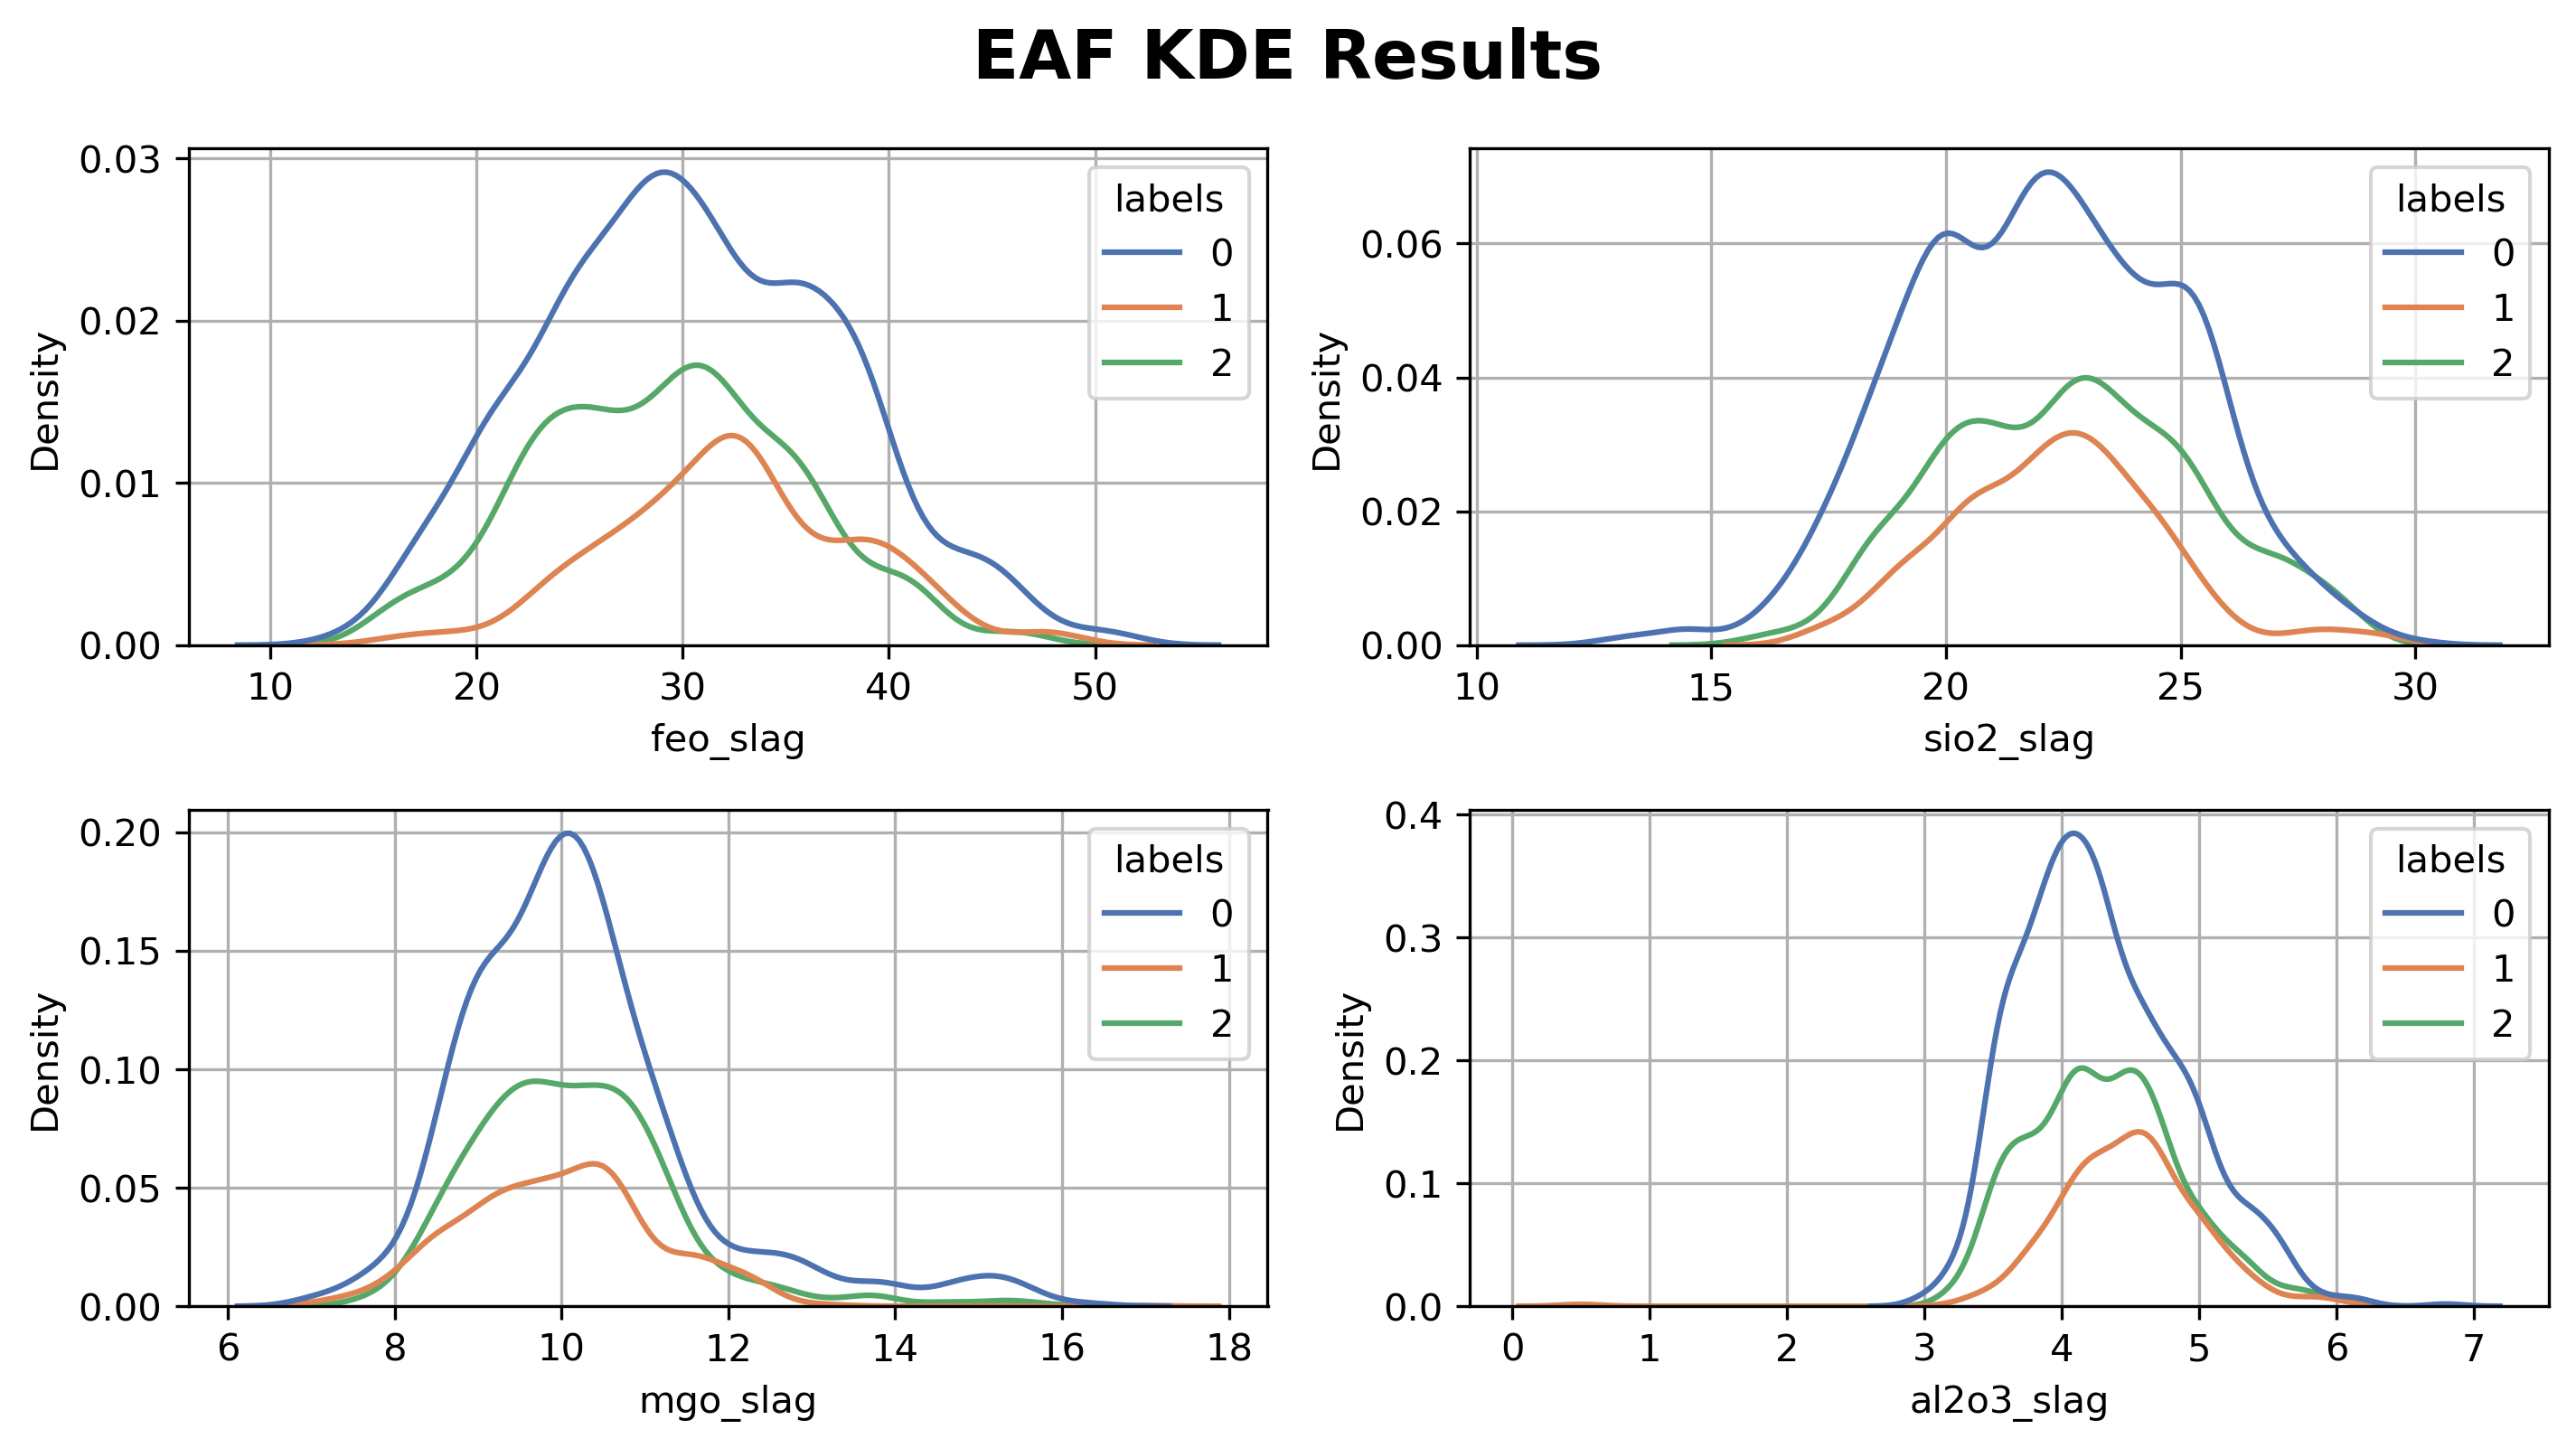

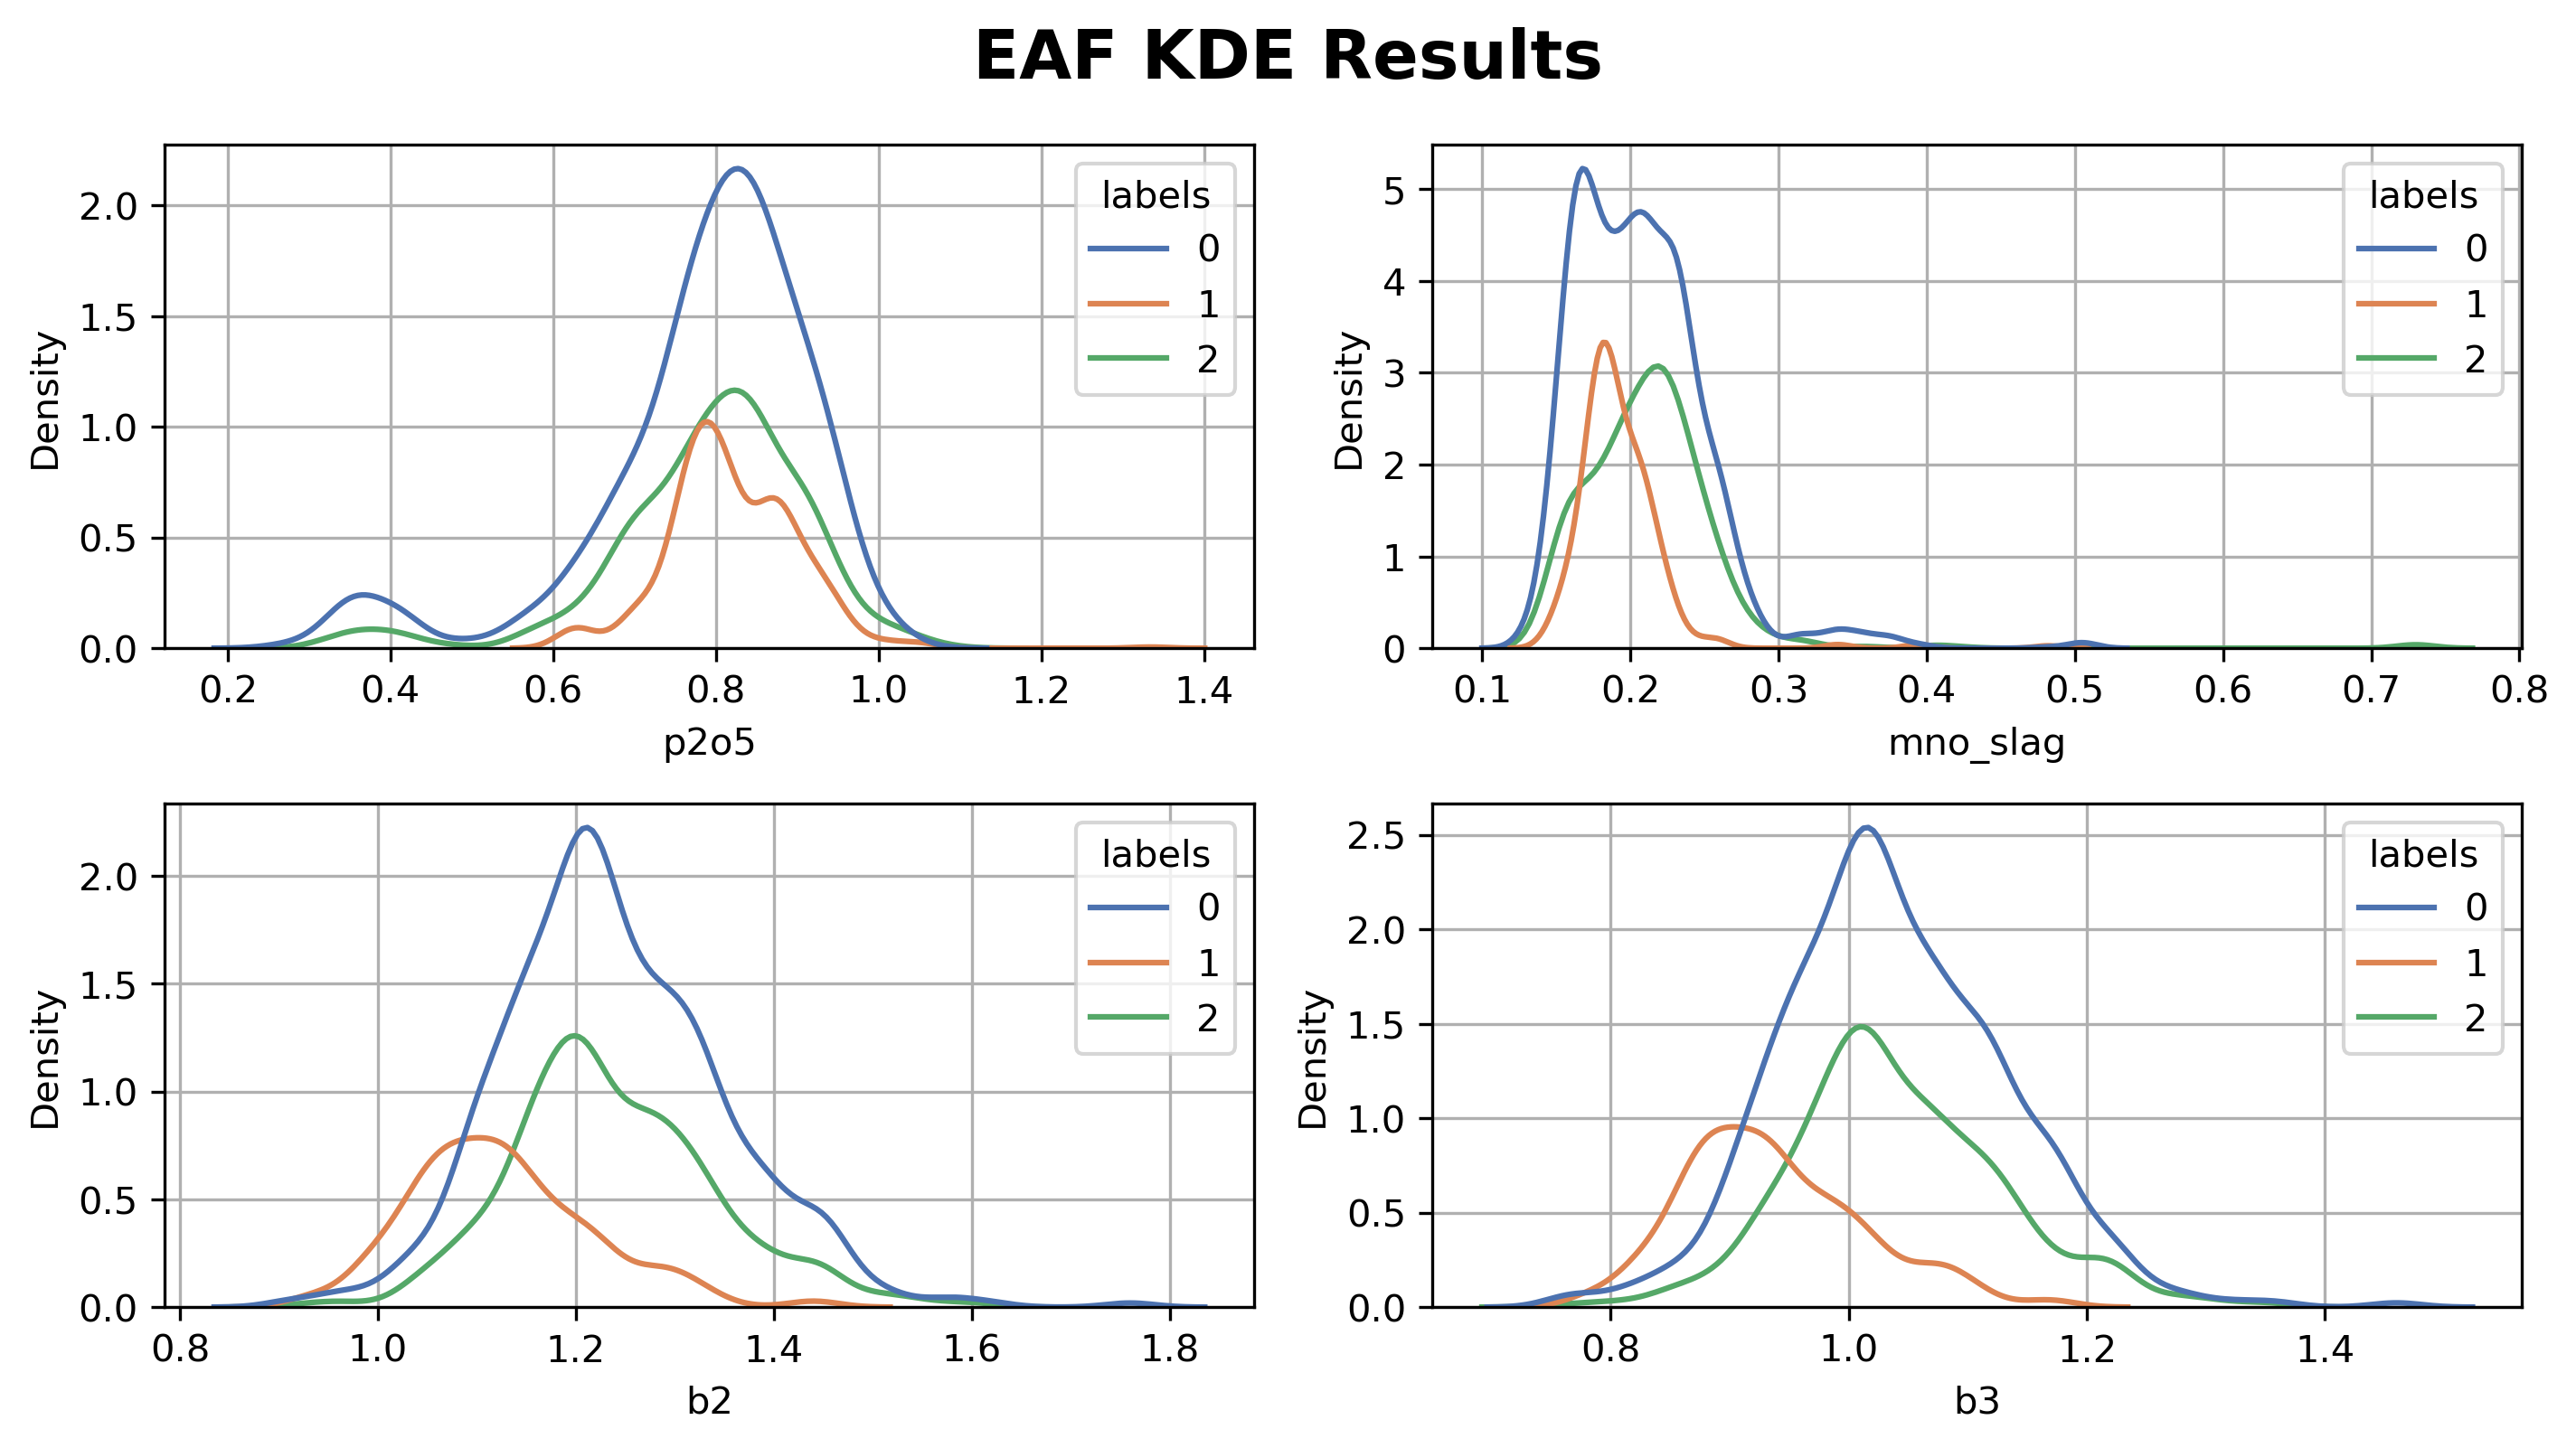

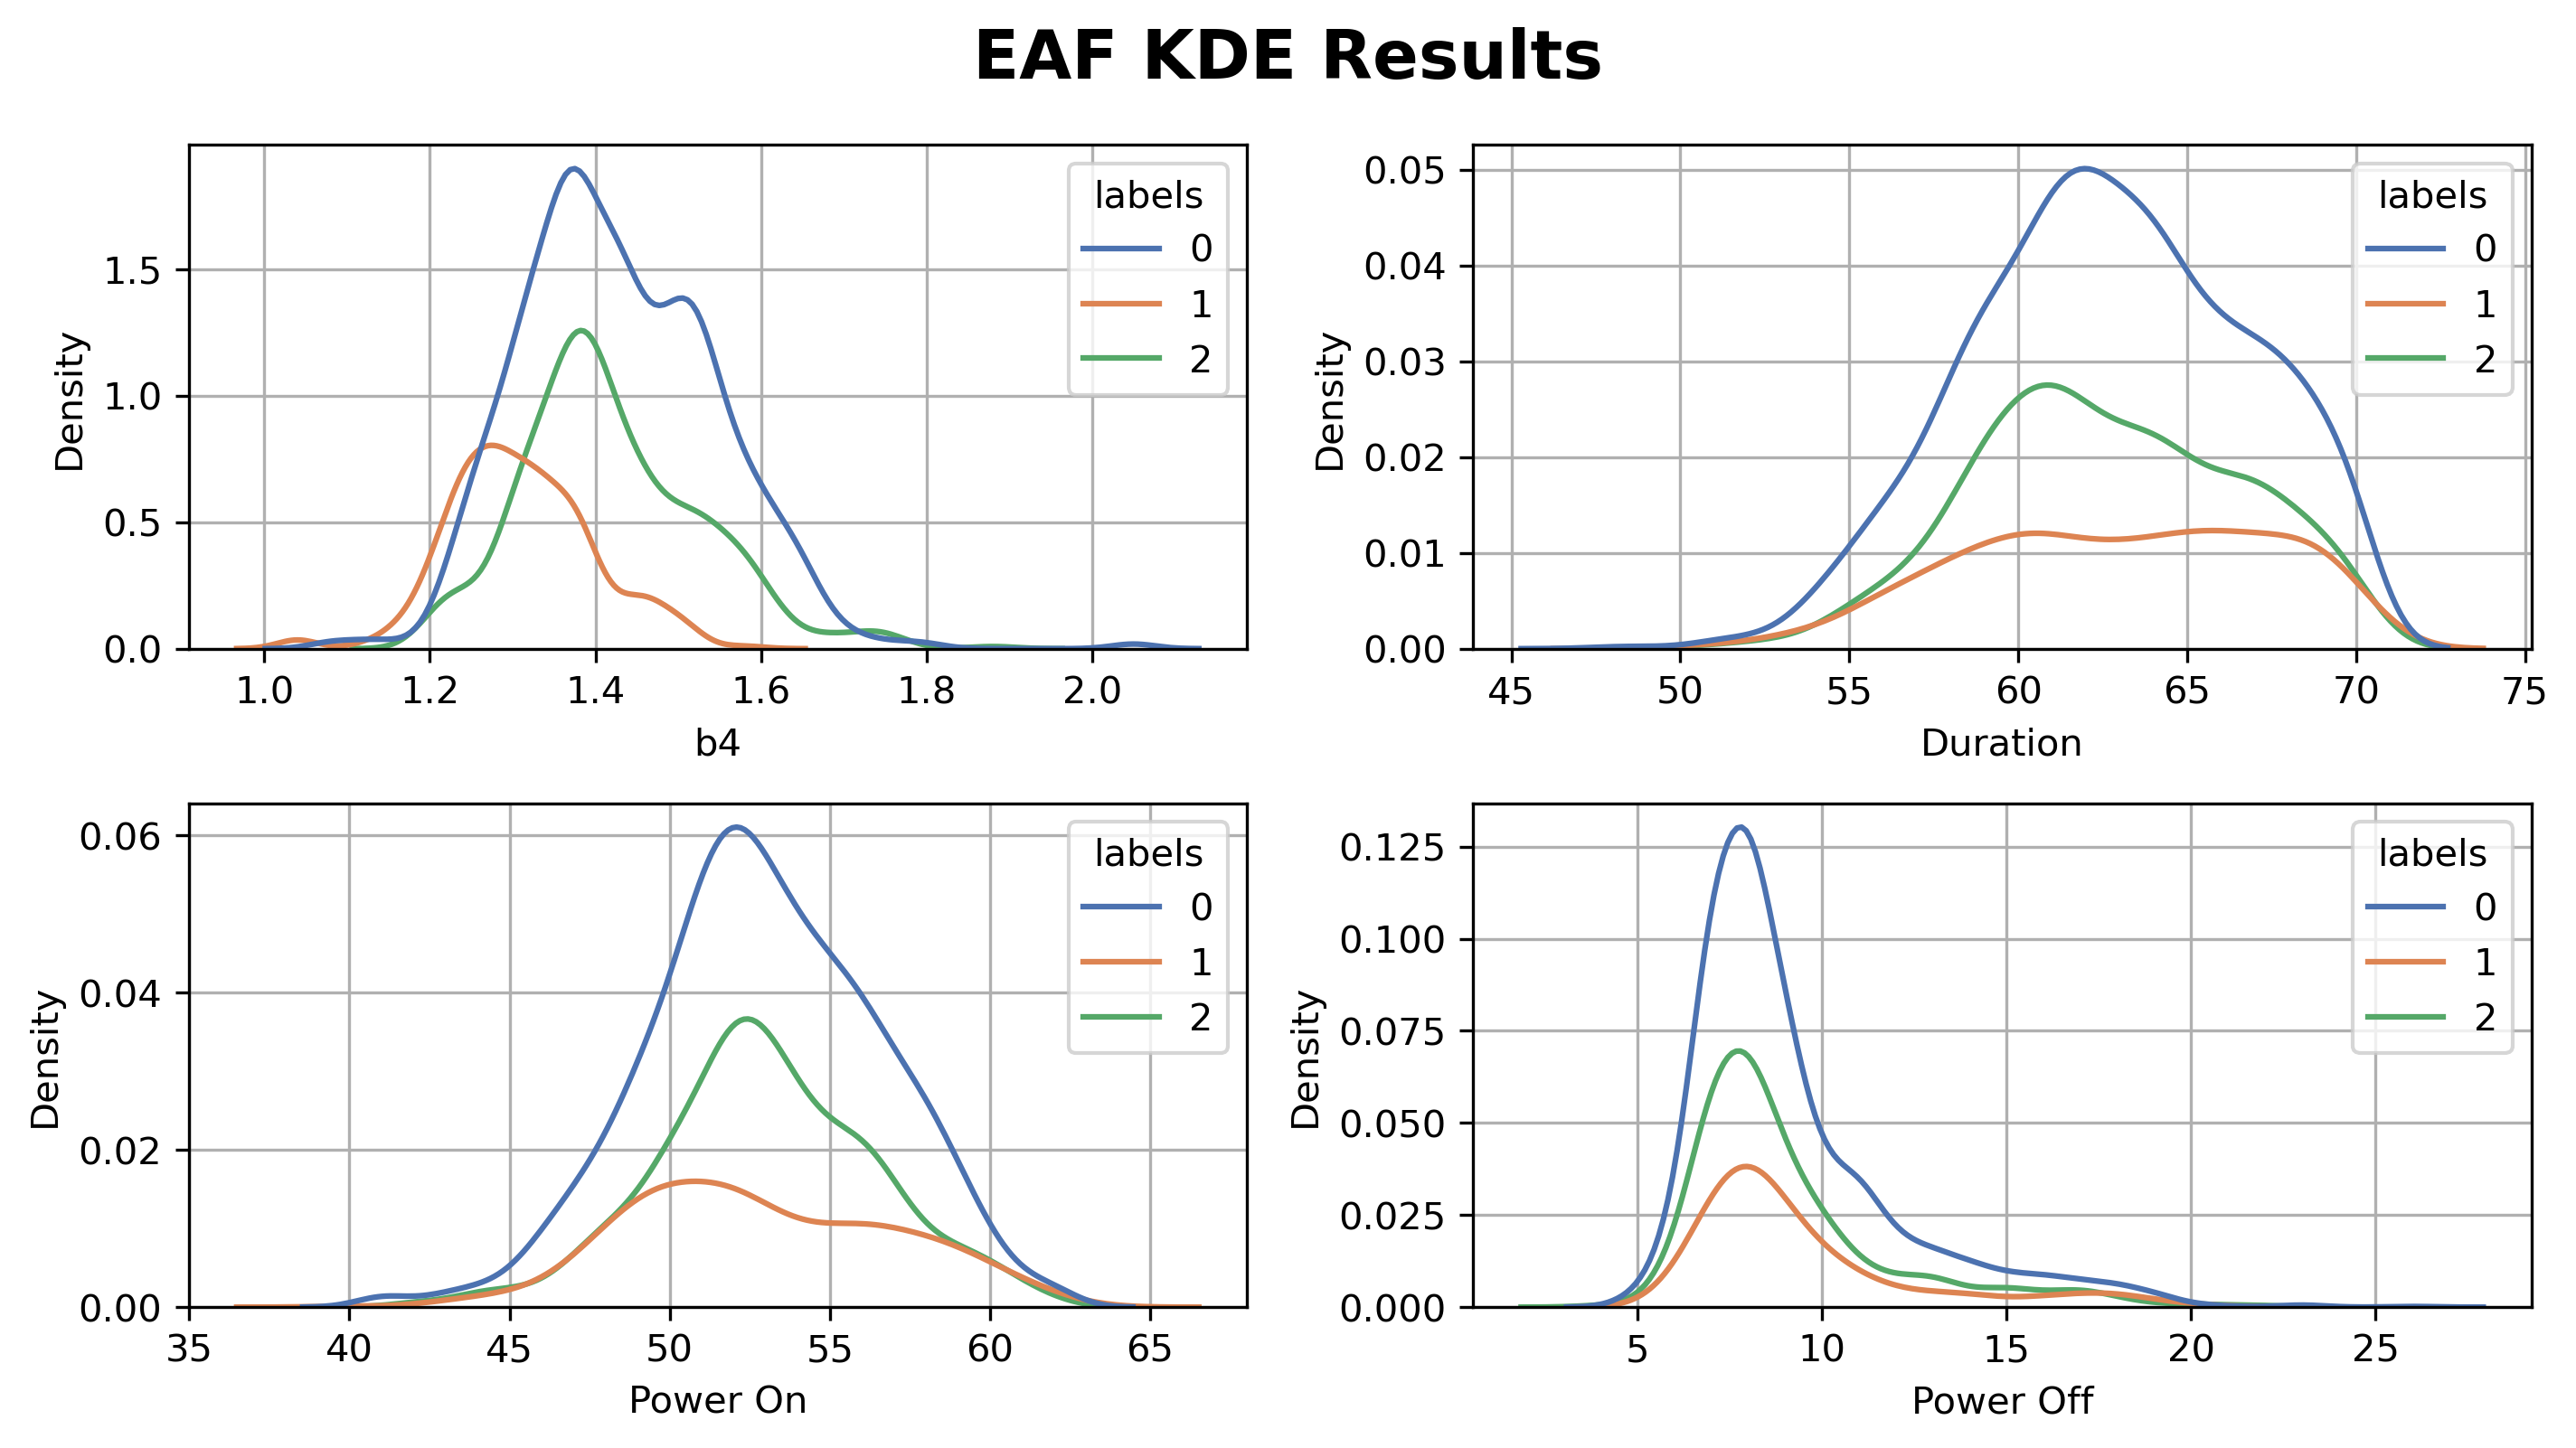

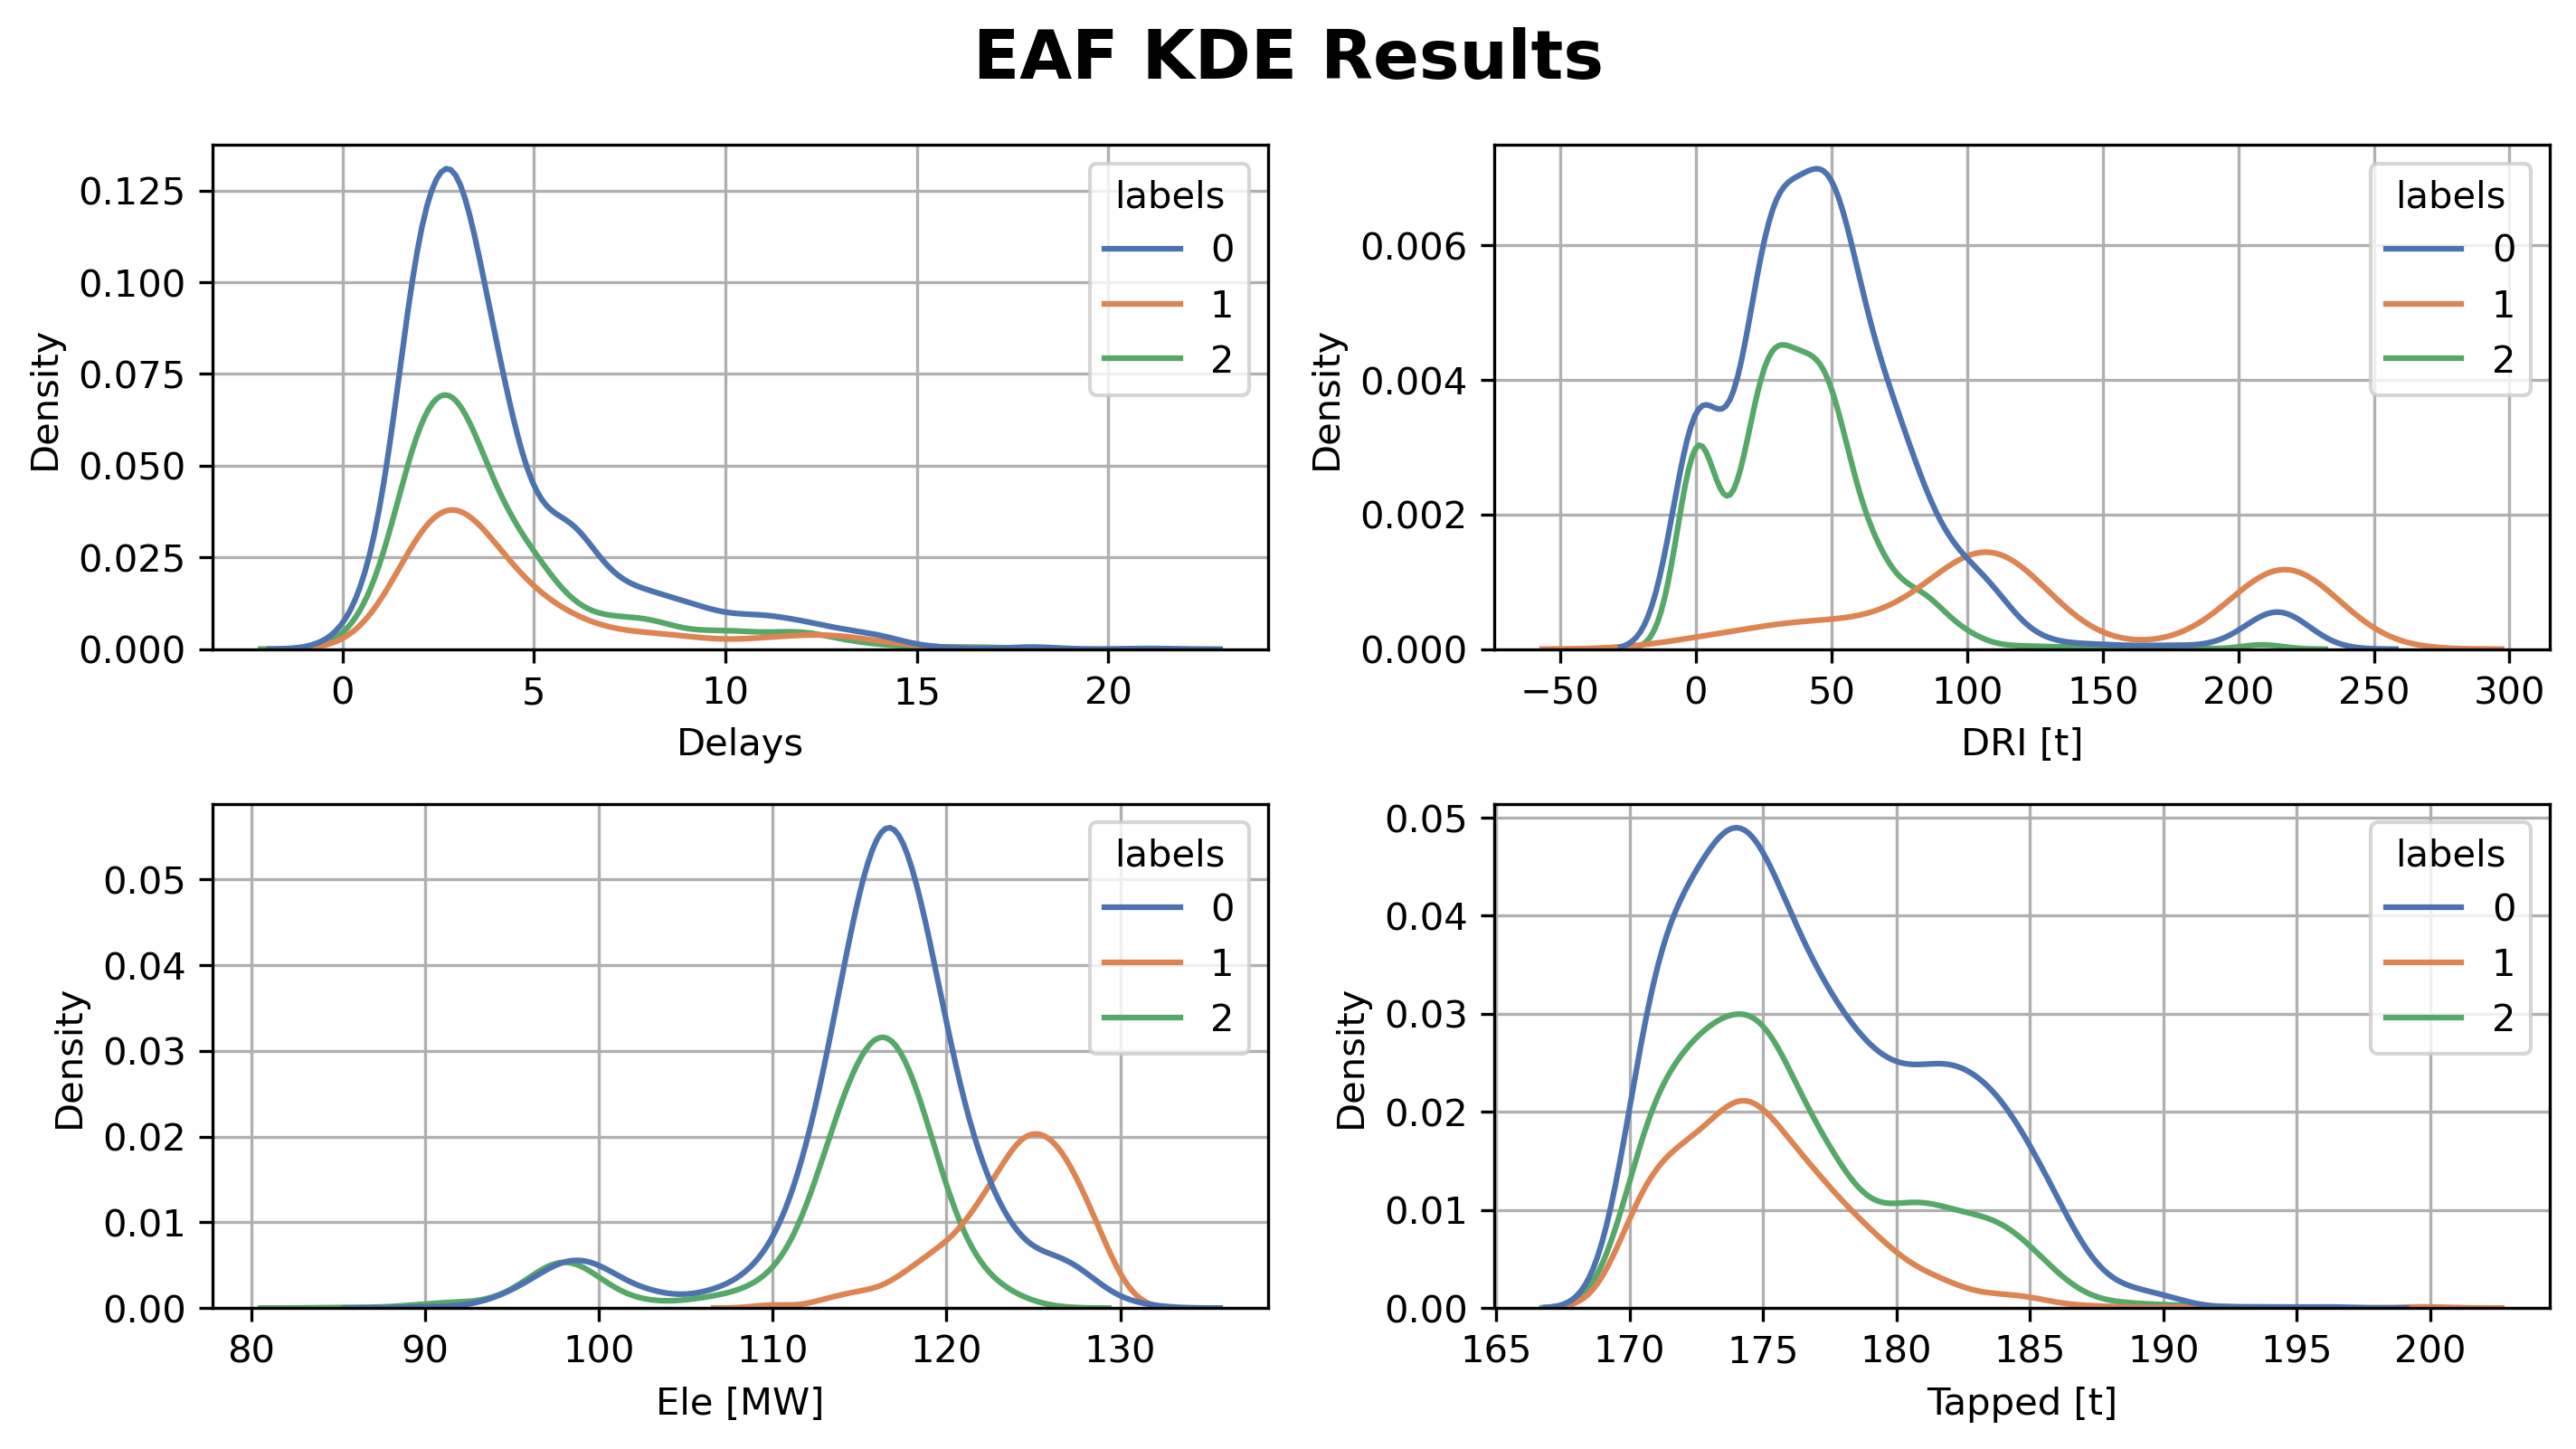

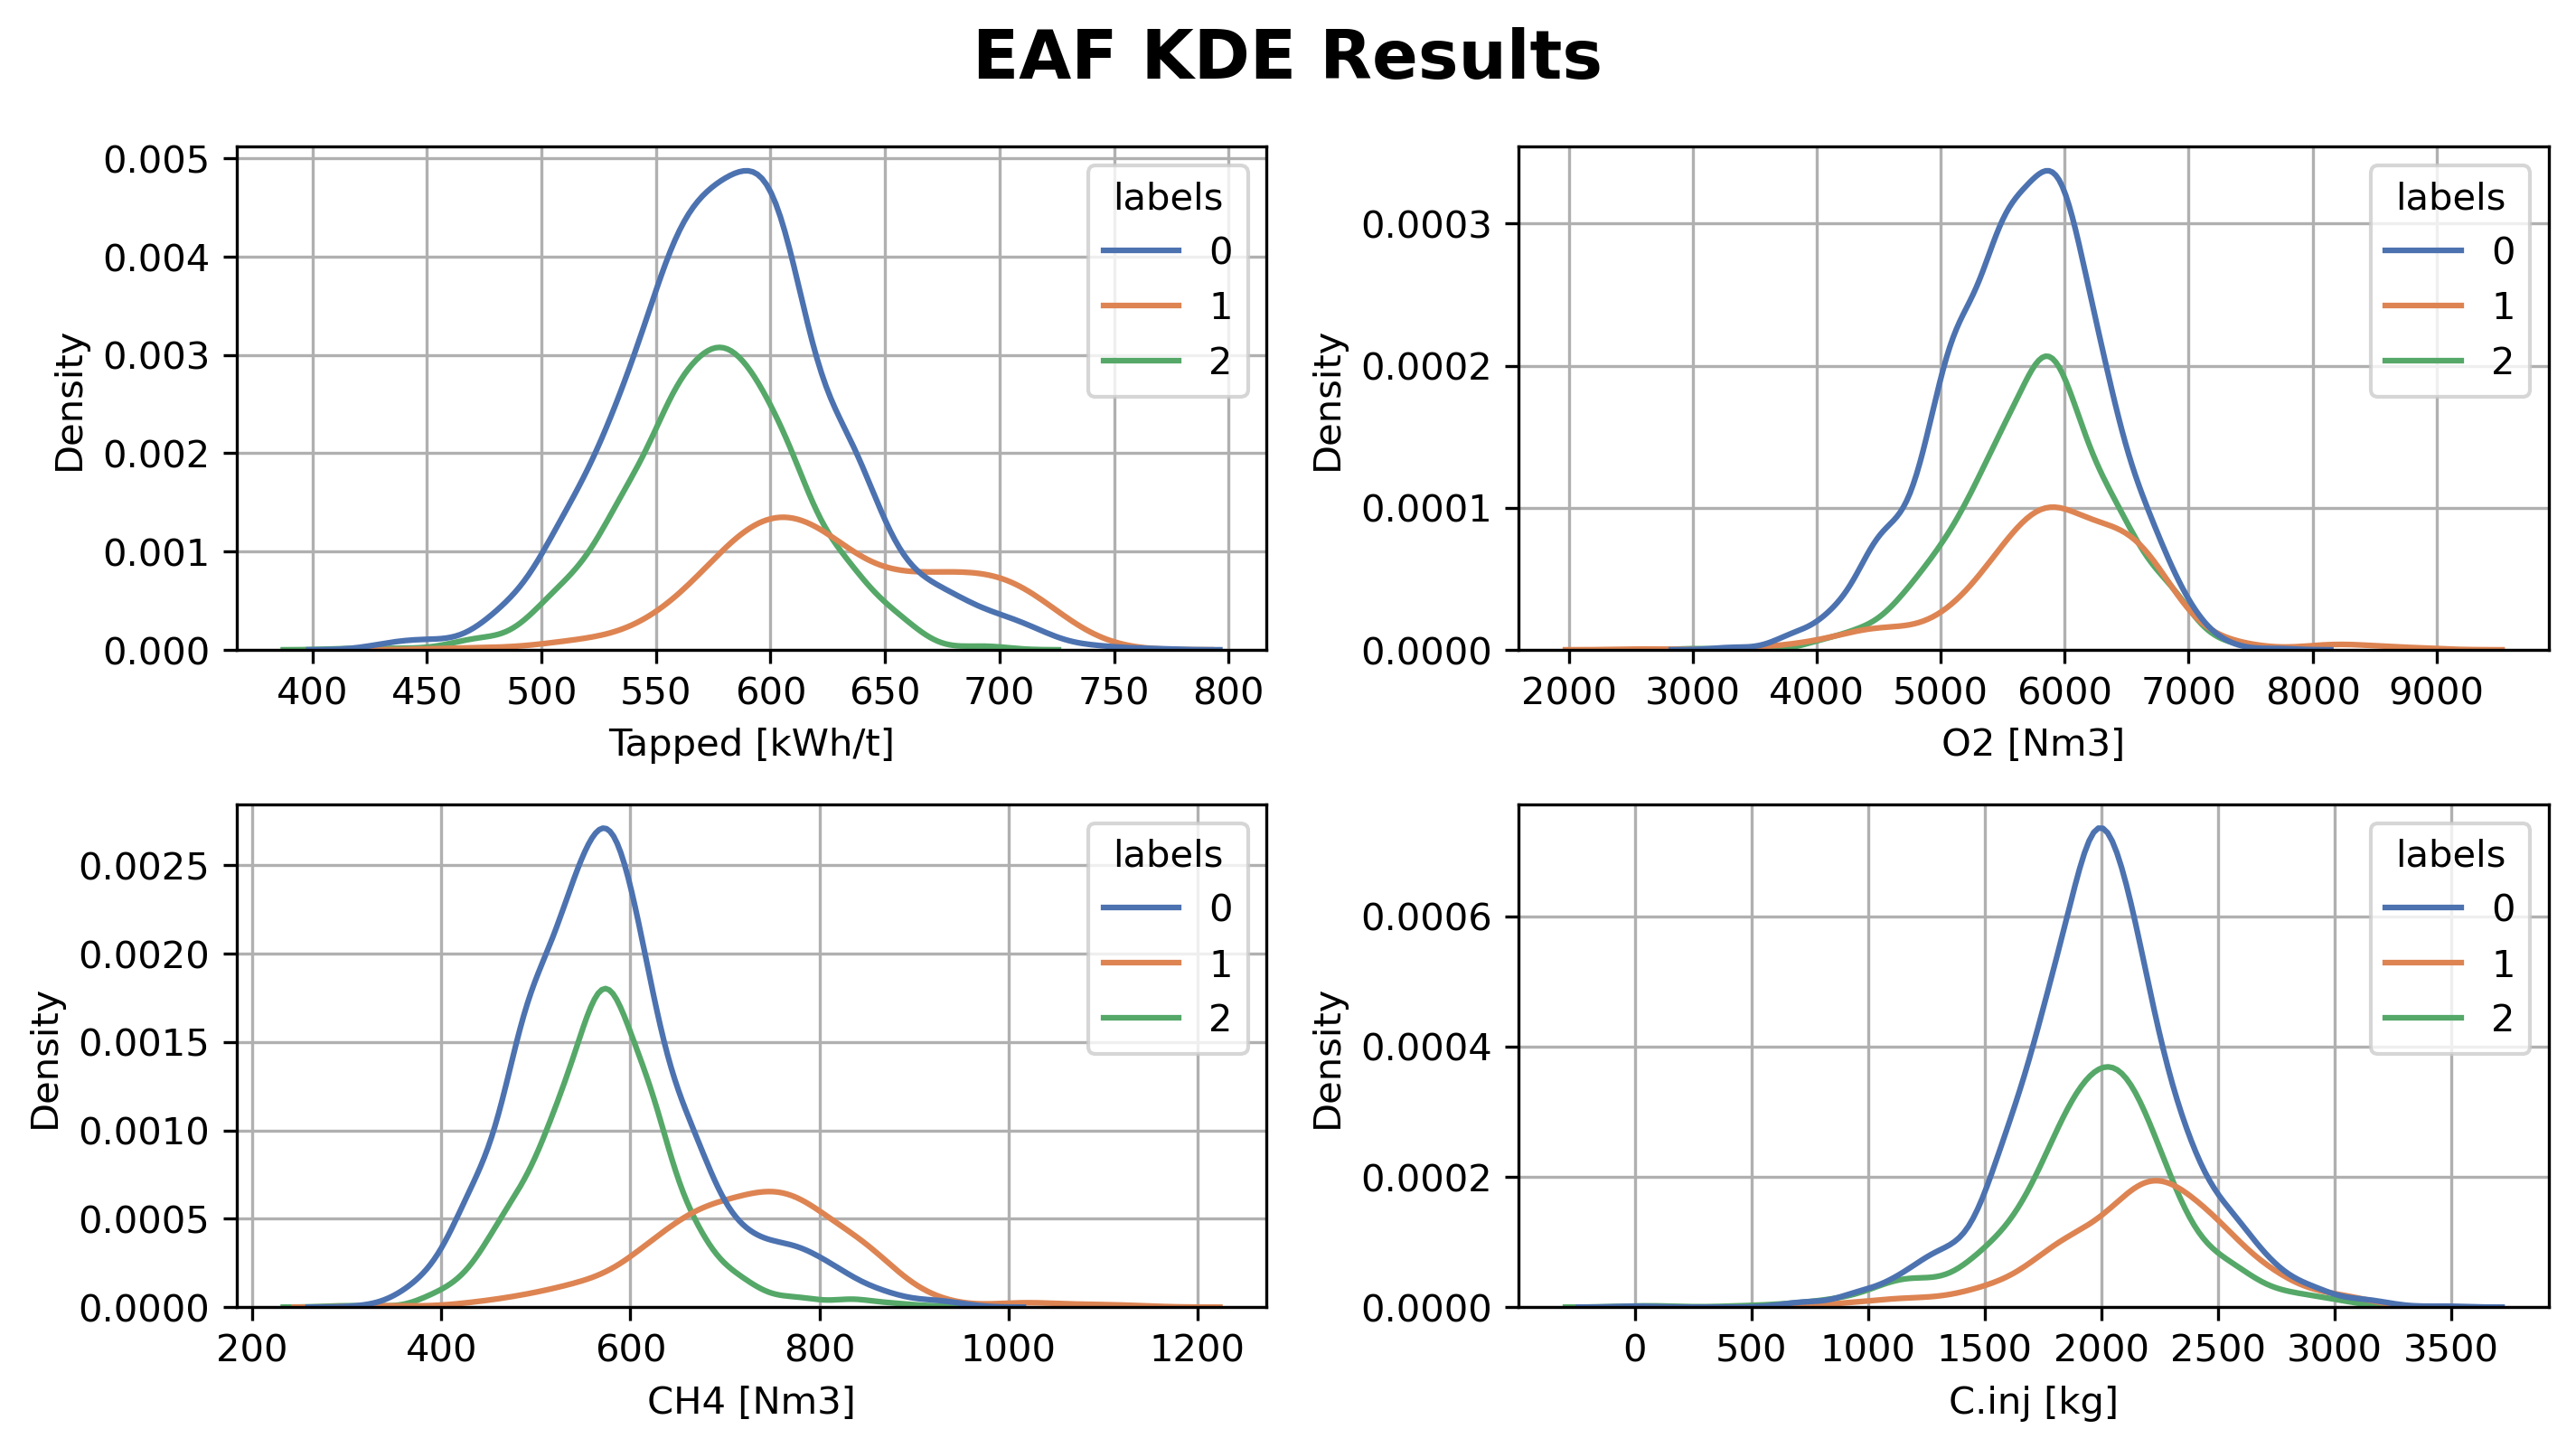

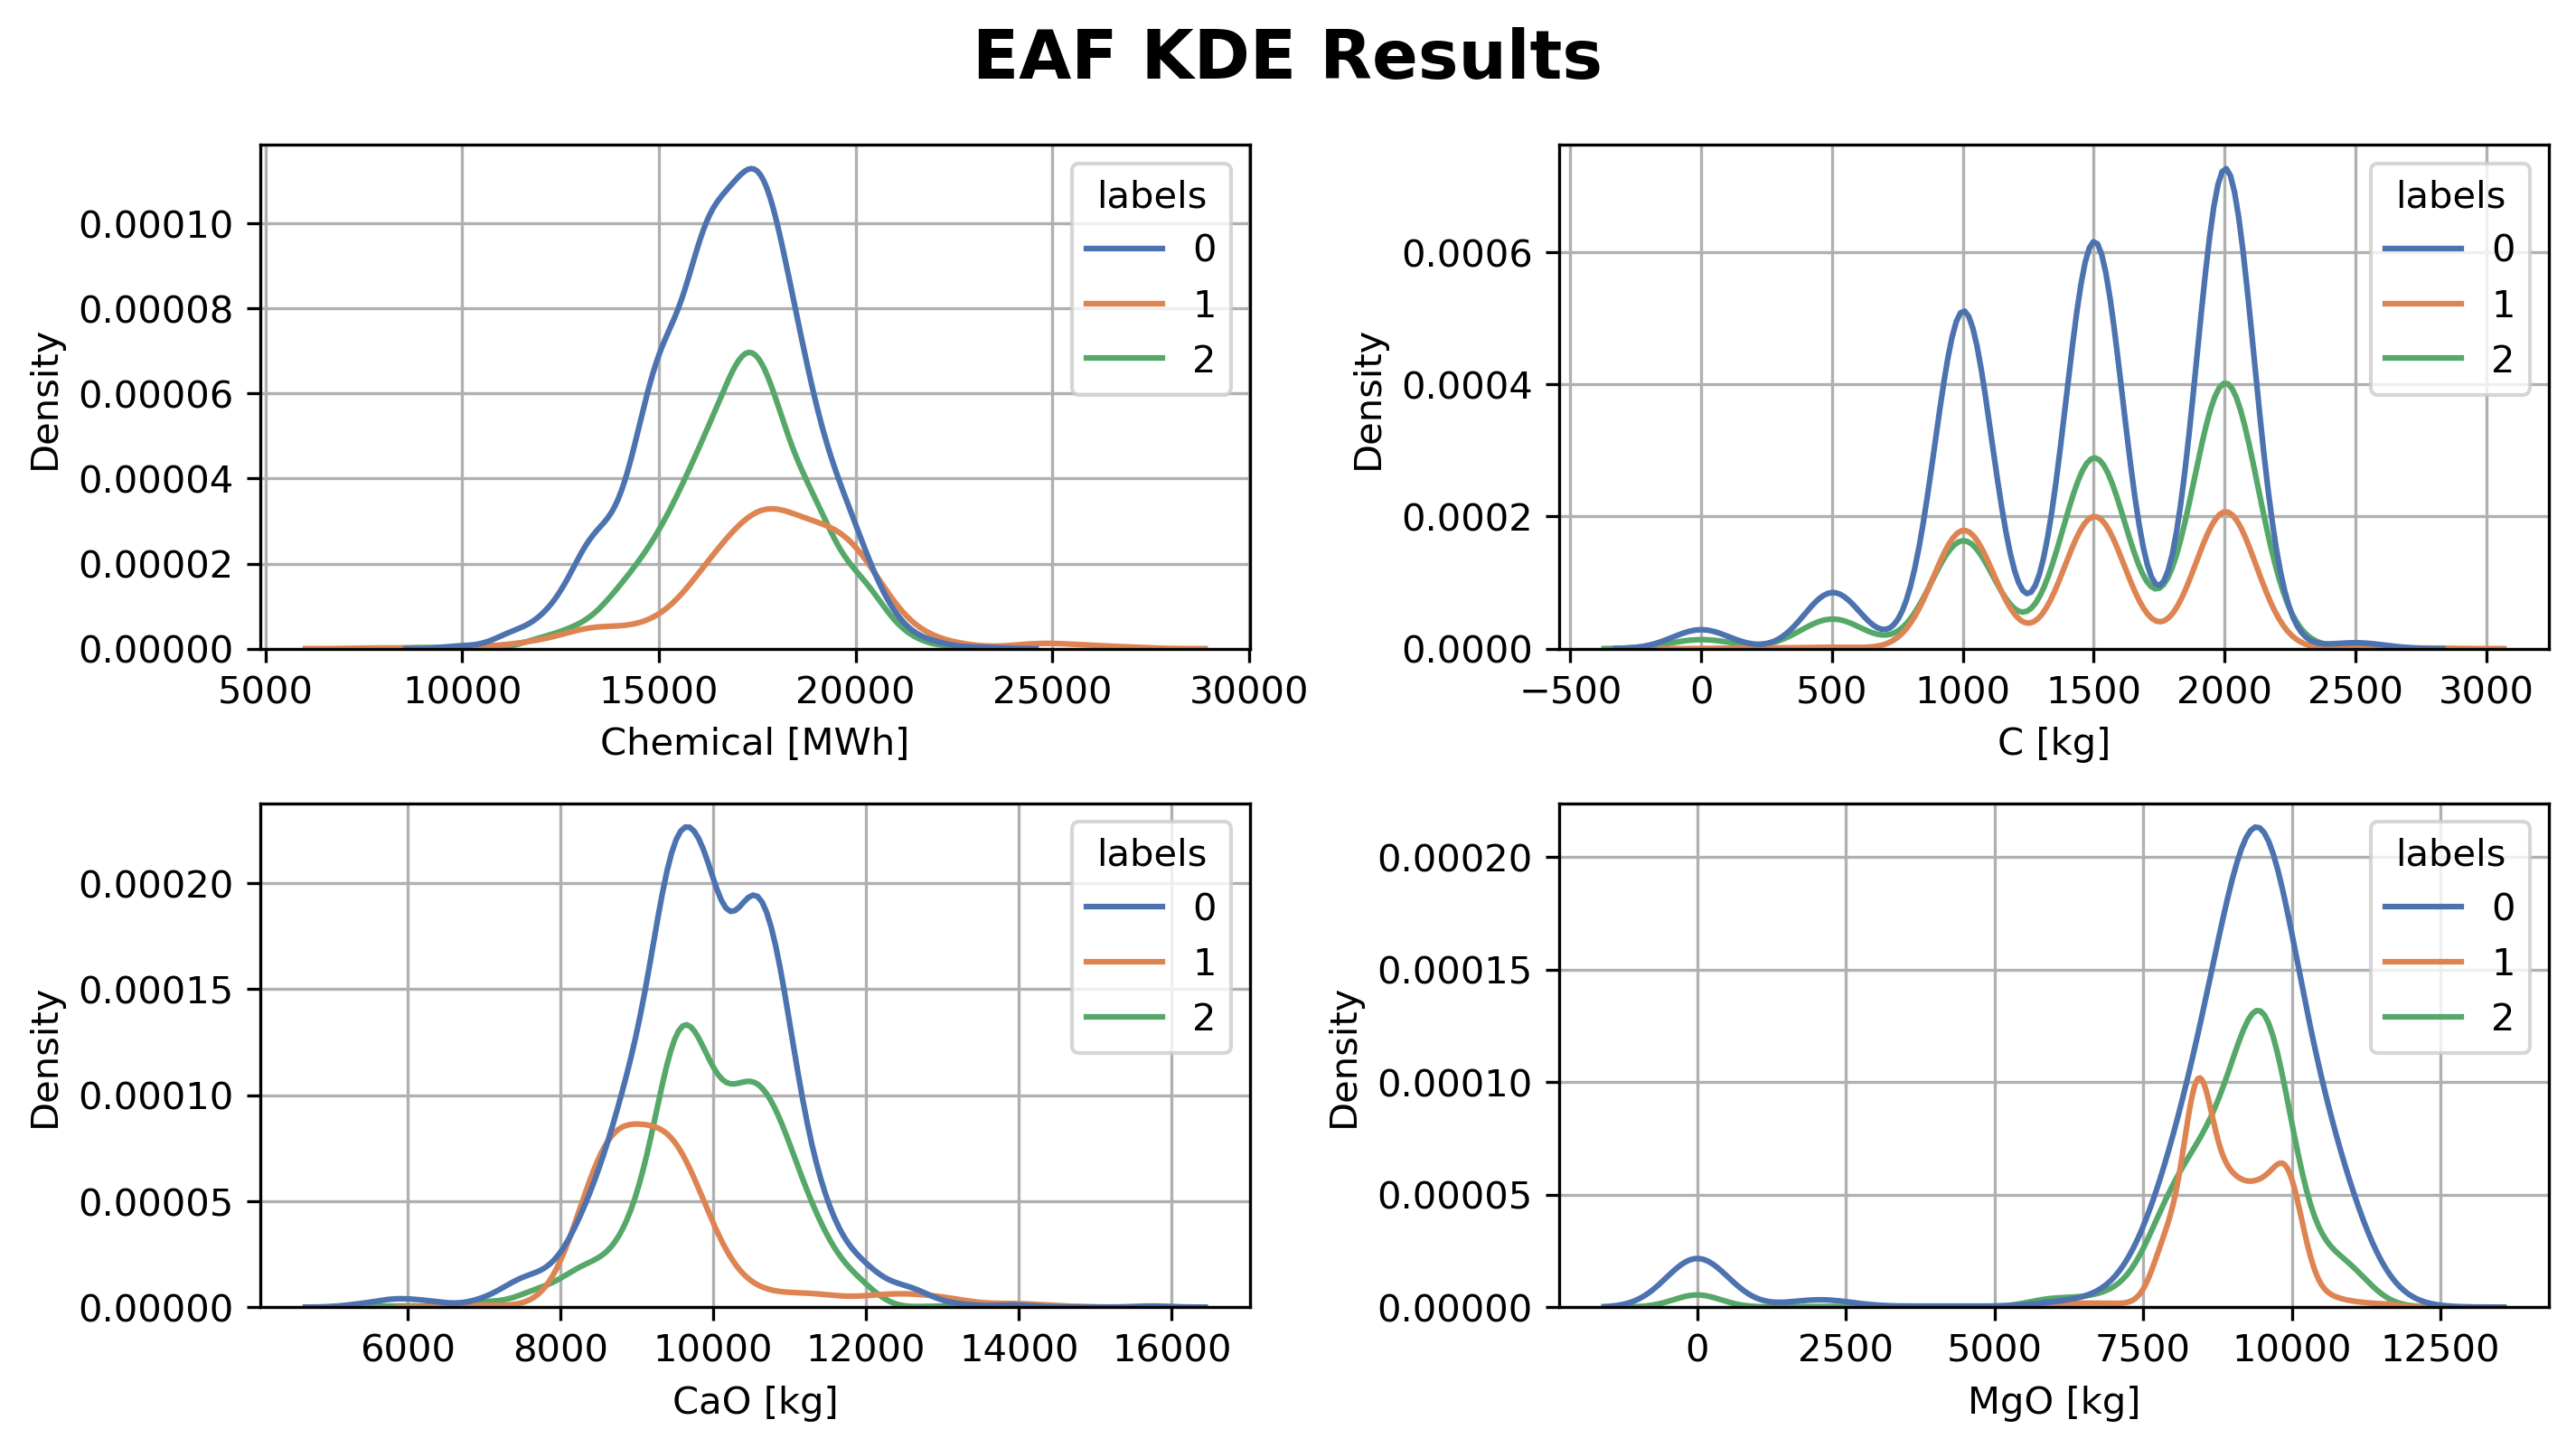

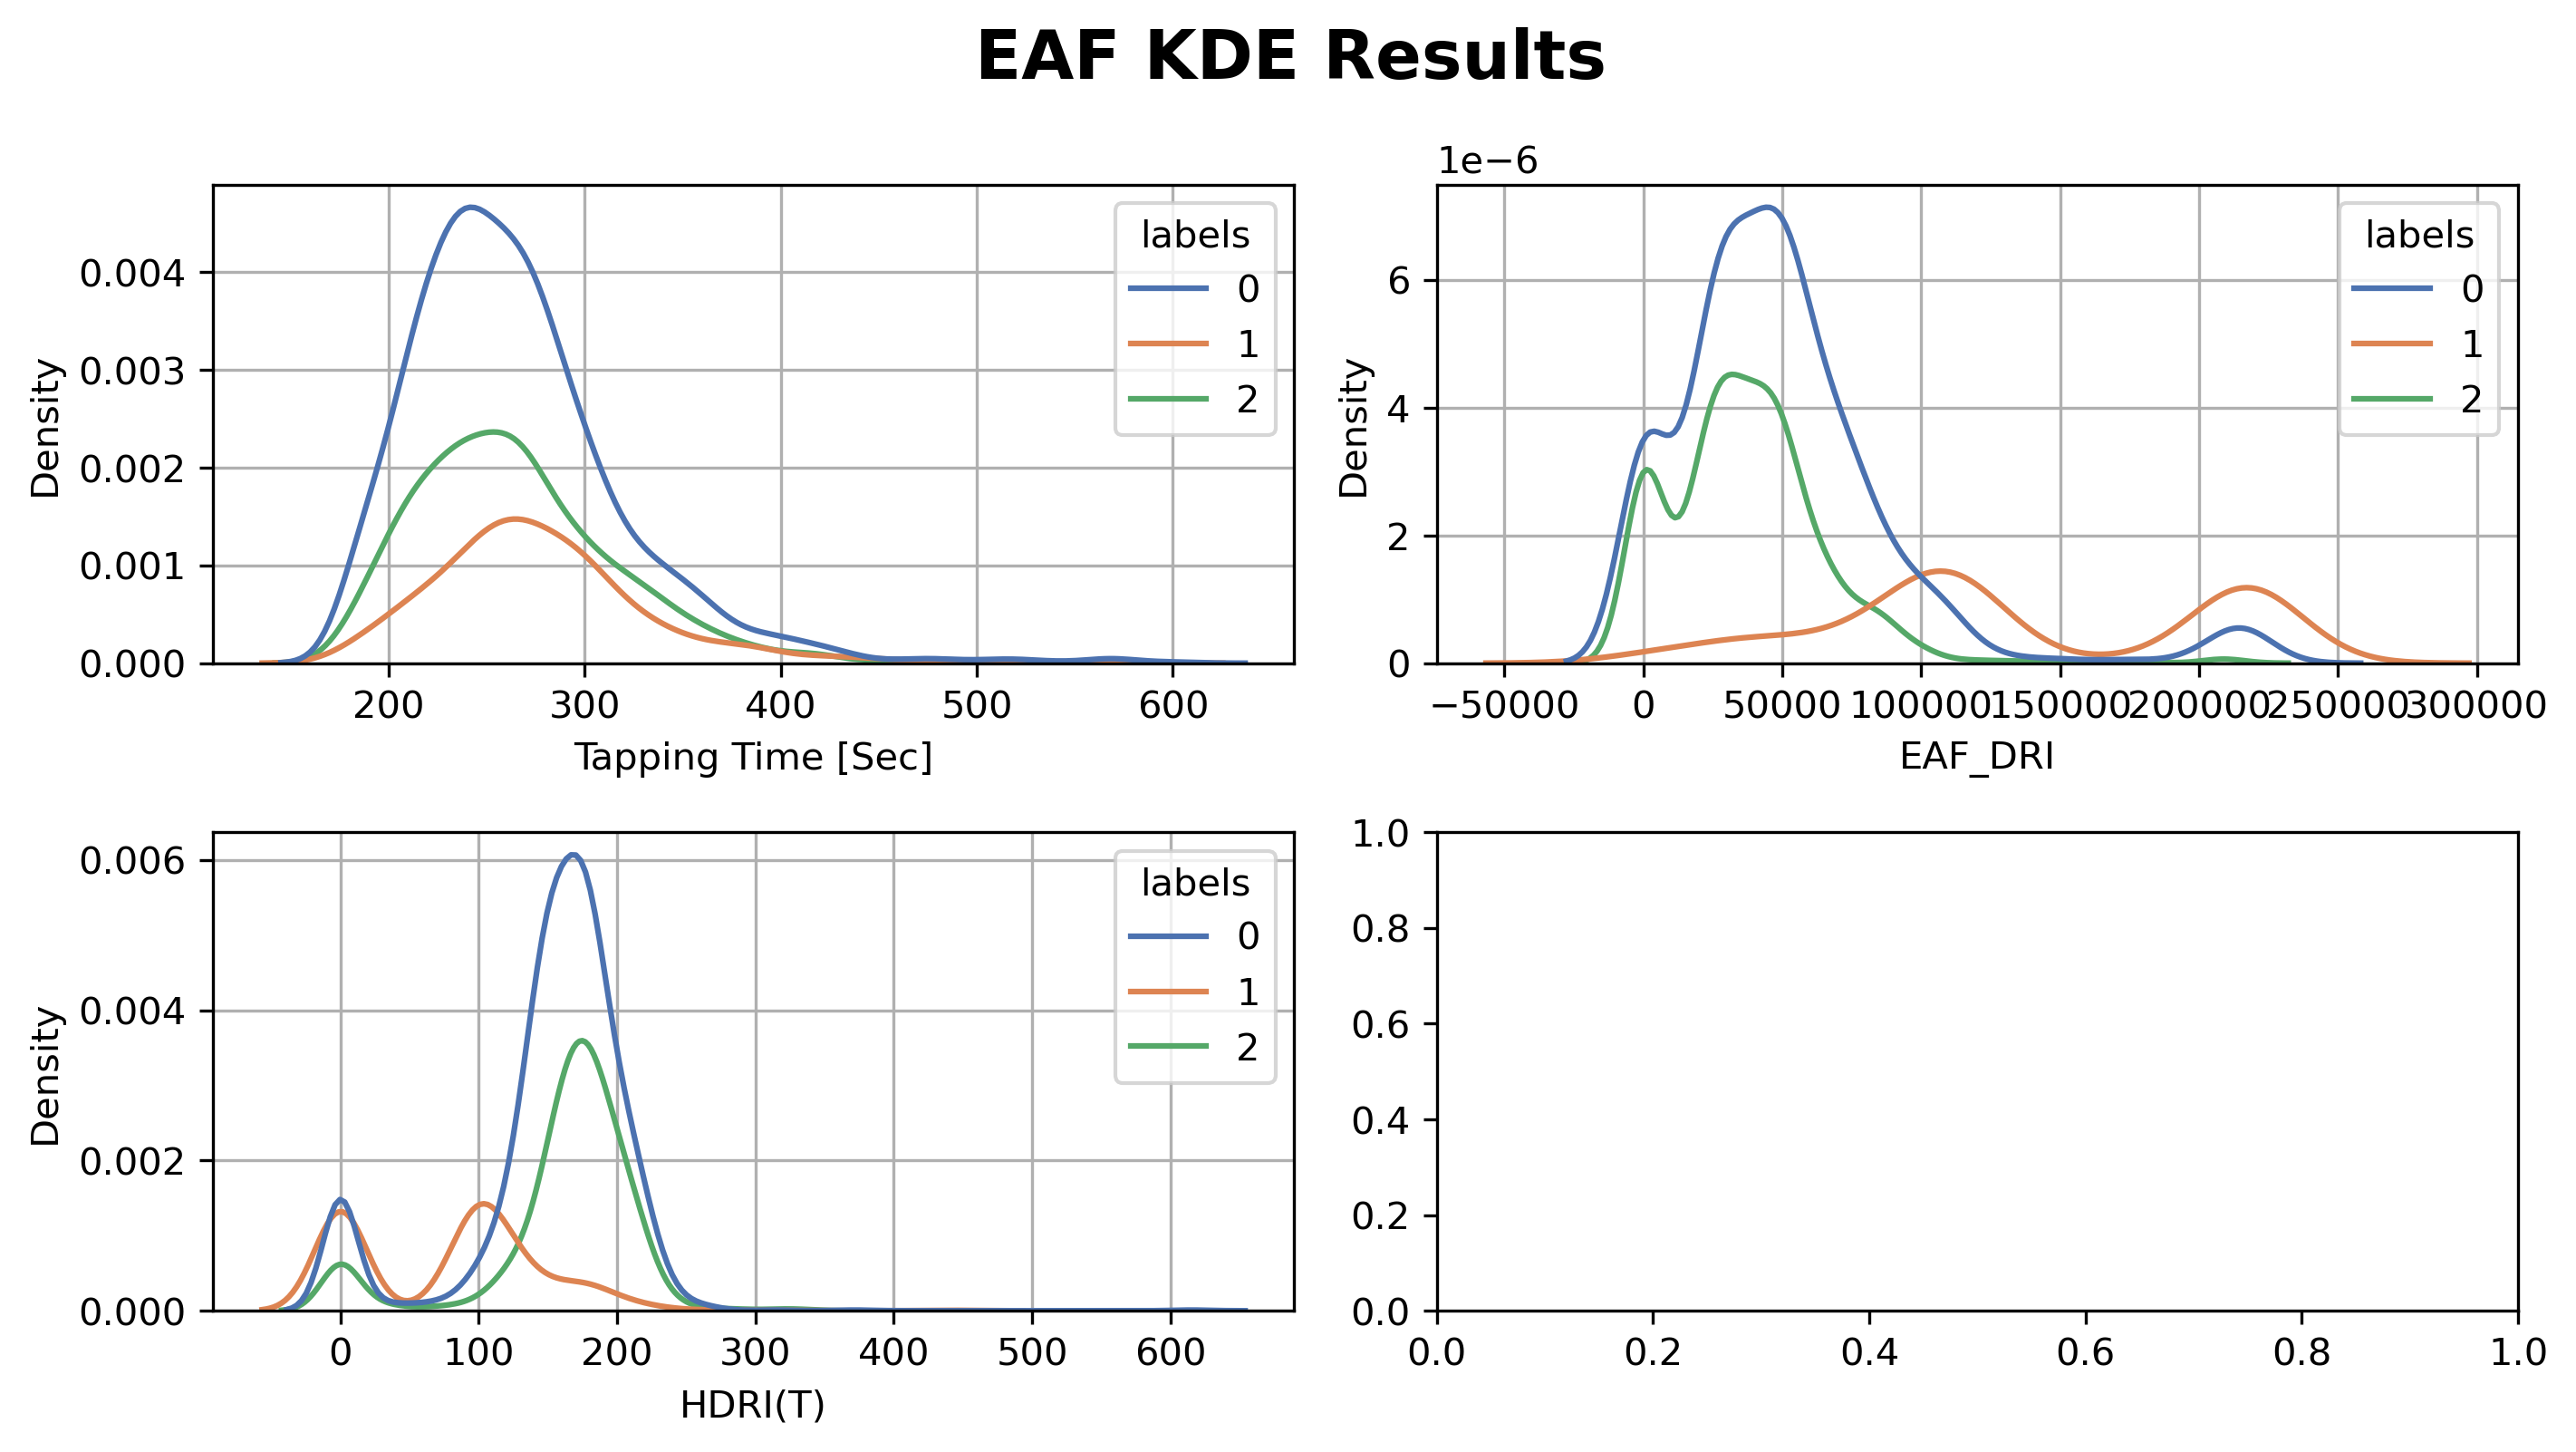

In [23]:
df = pd.read_csv(f"{working_dir}/data/eaf_and_feed_all.csv")
df.drop(labels=['Slag_Label'] ,axis=1,inplace=True)
df.set_index(keys='Heat', inplace=True ,drop=True)
print(df.shape)
#--------Normalizing-------- 
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)
#--------Correlation--------
corr_df = normal_df.corr().abs()
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k= 1).astype(bool)) #paiine matice motegharen ast ve hazf shod
high_corr_columns_name = pd.DataFrame(corr_df.ge(.95).stack().loc[lambda corr_df: corr_df].index.to_list())
print(high_corr_columns_name)
#df.drop(labels=['s315'] ,axis=1,inplace=True)
#-------Clustering---------
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
t_sne = TSNE(n_components=2, learning_rate='auto',random_state=0,
                  init='random', perplexity=50)
data=t_sne.fit_transform(normal_df)
sne_column_name = [f"SNE{column}"  for column in range(2) ]
sne_df = pd.DataFrame(data=data,columns=sne_column_name)
print(sne_df.shape)
model = AgglomerativeClustering(n_clusters = 3, metric= 'euclidean', linkage ='average')
model.fit(sne_df)
print(model.labels_.shape)
# ---------PLOT-------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('EAF T-SNE Clusters', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('Axis 0', fontsize=16,fontweight='bold')
ax1.set_ylabel('Axis 1', fontsize=16,fontweight='bold')
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(
    data=sne_df,
    x='SNE0',
    y='SNE1',
    hue=model.labels_,
    palette= cmap,
    )
fig.tight_layout()
#plt.savefig(f'{working_dir}/presentation/coke-1030-tsne-clusters.jpg')
plt.show()
#----------Labeling---------
clust_lable_dict = {0:0,1:1,2:2,3:3,4:4,5:5,6:6}
labels = [clust_lable_dict[i] for i in model.labels_]
df["labels"] = labels
print(df.shape)
#----------Labes Conditions-----
plot_name = df.columns.drop('labels')
print(plot_name)
num = 0
for k in range(14):
    fig = plt.figure(num=k,figsize=(9.6,5.4),dpi=300)
    fig.suptitle('EAF KDE Results', fontsize=18,fontweight='bold')
    ax = fig.subplots(2,2)
    #sns.set_style("ticks",{'axes.grid' : True})
    for i in range(2):
        for j in range(2):
            if num == len(plot_name):
                break
            ax[i][j].grid(True)
            sns.kdeplot(
                data=df,
                x=plot_name[num],
                hue="labels",
                #hue_order=[0,2,3,],
                fill=False,
                #alpha = 0.4,
                palette= cmap,
                ax=ax[i][j],
            )
            num = num +1
    fig.tight_layout()
#ax[0][0].xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax[0][0].axvline(83.4,color=cmap[0])
#ax[0][0].text(83.2, 0.2, '83.4', rotation=90, va='center')
#ax[0][0].axvline(80.6,color=cmap[1])
#ax[0][0].text(80.4, 0.2, '80.6', rotation=90, va='center')
#ax[0][1].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
#ax[0][1].axvline(0.96,color=cmap[0])
#ax[0][1].text(0.92, 1.6, '0.96', rotation=90, va='center')
#ax[0][1].axvline(1.39,color=cmap[1])
#ax[0][1].text(1.35, 1.6, '1.39', rotation=90, va='center')
#ax[1][0].xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax[1][0].axvline(2.4,color=cmap[0])
#ax[1][0].text(2.2, 0.2, '2.4', rotation=90, va='center')
#ax[1][0].axvline(1.5,color=cmap[1])
#ax[1][0].text(1.3, 0.2, '1.5', rotation=90, va='center')
#plt.savefig(f'{working_dir}/presentation/coke-1030-kde-results.jpg')
plt.show()
# save For next use
#df.to_csv(f"{working_dir}/data/coke_1030_with_labels.csv",index=True)
del df,normal_df,corr_df,high_corr_columns_name